In [1]:
#| echo: false

# code for corpus extraction

# libraries imported

from bs4 import BeautifulSoup
import future
import pandas as pd
import csv
import itertools
import uuid
import requests
import re
from IPython.display import display, Markdown
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

# link for digitized text of Natural History_book1-11
url1 = "https://topostext.org/work/148"

# link for digitized text of Natural History_book12-37
url2 = "https://topostext.org/work/153"

# function for text with geographical name annotation scraping

def toposgeotext(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise FileNotFoundError("Failed to retrieve HTML content: " + url)

    data = []
    soup = BeautifulSoup(response.content, features="lxml")
    links = soup.find_all("a", {"class": "place"})

    for link in links:
        Place_Name = link.contents[0]  # Place name
        ToposText_ID = link.get('about')  # ToposText ID
        Lat = link.get('lat')
        Long = link.get('long')
        Parent = link.find_parent("p")
        Text = Parent.text  # Extract related text
        Reference = Parent.get("id")  # Indicate book, chapter, paragraph

        # Separate the information in Text using the regular expression pattern
        match = re.search(r'§\s+(\d+\.\d+\.\d*)\s+(.*)$', Text)
        if match:
            Chapternparagraph = match.group(1)  # Extract the reference from the pattern
            Text = match.group(2)  # Extract the remaining text from the pattern
            
            # Extract the book, chapter, and paragraph components
            book, chapter, paragraph = Chapternparagraph.split('.')
            
            UUID4 = uuid.uuid4()  # Create a unique ID

            data.append({
                'UUID4': UUID4,
                'ToposText_ID': ToposText_ID,
                'Place_Name': Place_Name,
                'Reference': Reference,
                'Lat': Lat,
                'Long': Long,
                'Book': book,  # Add the book component to the DataFrame
                'Chapter': chapter,  # Add the chapter component to the DataFrame
                'Paragraph': paragraph,  # Add the paragraph component to the DataFrame
                'Text': Text
            })

    df = pd.DataFrame(data)
    # Convert data types to numeric
    df['Book'] = pd.to_numeric(df['Book'], errors='coerce')
    df['Chapter'] = pd.to_numeric(df['Chapter'], errors='coerce')
    df['Paragraph'] = pd.to_numeric(df['Paragraph'], errors='coerce')
    return df

# construct the dataframe for two parts of the digitized text with geographical annotations with the toposgeotext function
geodf1 = toposgeotext(url1)
geodf2 = toposgeotext(url2)

geotext_whole = pd.concat([geodf1, geodf2], ignore_index=True)

geotext_whole.to_csv('geotext_whole.csv')

# function for scraping entire text from ToposText with given html

def topostext(url):
    response = requests.get(url)
    if response.status_code != 200:
        raise FileNotFoundError("Failed to retrieve HTML content: " + url)
    
    data = []
    soup = BeautifulSoup(response.content, features="lxml")
    links = soup.find_all("p")  # Find all <p> tags instead of filtering by class

    for link in links:
        match = re.search(r'§\s+(\d+\.\d+\.\d*)\s+(.*)$', link.text)
        if match:
            Chapternparagraph = match.group(1)  # Extract the reference from the pattern
            # Extract the book, chapter, and paragraph components
            book, chapter, paragraph = Chapternparagraph.split('.')
            Text = match.group(2)  # Extract the text from the pattern
            Reference = link.get("id")  # Indicate book, chapter, paragraph
            UUID4 = uuid.uuid4()  # Create a unique ID

            data.append({
                'UUID4': UUID4,
                'Reference': Reference,
                'Book': book,  # Add the book component to the DataFrame
                'Chapter': chapter,  # Add the chapter component to the DataFrame
                'Paragraph': paragraph,  # Add the paragraph component to the DataFrame     
                'Text': Text
            })

    df = pd.DataFrame(data)
    # Convert data types to numeric
    df['Book'] = pd.to_numeric(df['Book'], errors='coerce')
    df['Chapter'] = pd.to_numeric(df['Chapter'], errors='coerce')
    df['Paragraph'] = pd.to_numeric(df['Paragraph'], errors='coerce')
    return df

# construct the dataframe for two parts of the digitized text with the topostext function
df1 = topostext(url1)
df2 = topostext(url2)

# combine the two parts of scraped text
wholebook = pd.concat([df1, df2], ignore_index=True)

# store the scraped text into csv file
wholebook.to_csv('wholebooktext.csv')

## Introduction {#sec-introduction}

### *Natural History* and its complexity
Pliny the Elder's *Natural History* is widely recognized as the earliest encyclopedia in the world, manifesting a pioneering effort in comprehensively cataloging the vast array of human knowledge from that era. 

The work is thematically divided into 37 books, covering a diverse range of subjects including astronomy, geography, zoology, botany, medicine, and more. Pliny meticulously consulted a wide range of Greek and Roman references, totaling approximately 2,000 volumes^[*Natural History* 1.5.1 (<a href="https://topostext.org/work/148" target="_blank">https://topostext.org/work/148</a>)], and interwove his own literary interpretation or comments to the narratives.

Despite the carefully designed knowledge-ordering framework [@lao2016], scholars have observed a paradoxical complexity in *Natural History*, evident in its linguistic style, narrative approach, and use of references. The work compiles inconsistent toponyms from Greek and Latin, includes digressions in descriptions [@roller2022], exhibits changes in vocabularies and sentence structures  [@pinkster2005]. However, it is precisely this complexity that makes the work more fascinating and not only a valuable source to the knowledge and worldview of the ancient world, but also a gateway into Pliny's conceptualization, imagination, and even the prevailing imperial ideology.

The complexity and interconnectivity of the general structure of *Natural History* is further highlighted in different aspects by refreshing approaches. In terms of content organization of the work, @healy1999 vandicated Pliny's original contribution in unveiling the technology and science engagement of the Rome Empire from the description about natural phenomena and scientific experiment to the development of scientific language in Latin, taking the historical, political and liguistic context into consideration. And @naas2002 discussed how Pliny formulated the the diversed materials into his encyclopaedic structure, revealing the work's multifaceted nature as an epistemological, ideological, and moral project. By analysing Pliny's employment of the historical exemplum in the work, @schultze2011 argues how the specific literary device directed and teased the readers and established a profound connection between human beings and the entire spectrum of nature in *Natural Hisroty*.


In addition to the close reading methods used in the prior analyses of the context and references in *Natural History*, @rydberg-cox2021 employs network analysis method with different metrics to map the interrelationships between Pliny's sources and the topics discussed in the work. Furthermore, @fantoli2022 presents a comparative study of book 2 of *Natural History* and book 7 of Seneca’s work *Natural Questions*, both centered on astronomy, utilizing statistical analysis to identify Pliny's unique stylistic features based on variations in their discourse distribution, and proved the encyclopedic authorial intent shown in *Natural History* with correspondence and tree analysis. These two studies also demonstrate how distant reading methodologies offer novel insights into the understanding of ancient treatises.

### Spatial perstpective in *Natural History*
As pointed out by @beagon2011, differenciating from his pressedors, Pliny showed a "terrestrial curiosity" in *Natural History*, emphasizing a recognition of the physical, material world. In this regard, the vision of geography plays a pivotal role in distributing information, knowledge, and events throughout *Natural History*. 

Drawing from the long-established topographical and ethnographic traditions, Pliny seamlessly connects volumes dedicated to geography (books 3-6) with broader elements, activities, and cultural, historical, and societal contexts[@roller2022], exemplified in his portrayal of exotic plants, communities' habitats, imperial expeditions, and trade ventures. In other words, geographical names occured in each book of *Natural History* served as signposts guiding readers through diverse lands, shedding light on how Pliny and his contemporaries perceived and conceptualized the world around them.

A normalized frequency of place name occurence in the work is calculated as the ratio of counts of the occurrences of place names in each book to the word lengths of the book (@tbl-place_book_distribution). The bar chart (@fig-place_distribution) depicted the comparison of distribution of place names in the books of *Natural History*. The observation is in line with content structure of *Natural History*, that books 3-6 centered around the themes of "Geography and ethnography", contains the most mentions of location names, and place names are also frequently referred in books about agriculture and horticulture (book 12-14), aquatic life (book 31), and mining and mineralogy (book 34-37).

In [9]:
#| label: tbl-place_book_distribution
#| tbl-cap: Normalized distribution of place names in *Natural History*
#| df-print: tibble

# Group the items by "Book" and calculate the total word length

book_word_lengths = wholebook.groupby('Book')['Text'].apply(lambda x: x.str.split().str.len().sum()).reset_index()
book_word_lengths.columns = ['Book', 'Total_length']
# Set the "Book" column as the index
book_word_lengths.set_index('Book', inplace=True)

place_counts = geotext_whole['Book'].value_counts().reset_index()
place_counts.columns = ['Book', 'Place_count']
place_counts.set_index('Book', inplace=True)

place_distribution = book_word_lengths.merge(place_counts, on='Book')
place_distribution['Place_freq'] = place_distribution['Place_count']/place_distribution['Total_length']

pd.options.display.width = 30
place_distribution

Total_length  \
Book                 
1             2778   
2            30570   
3            18037   
4            15434   
5            18872   
6            27891   
7            21204   
8            24176   
9            19197   
10           20816   
11           27345   
12           13906   
13           13243   
14           15277   
15           14552   
16           25442   
17           29387   
18           35850   
19           18822   
20           22743   
21           17896   
22           16491   
23           15764   
24           17491   
25           16734   
26           15448   
27           12444   
28           26476   
29           13976   
30           14395   
31           12204   
32           14635   
33           17946   
34           18972   
35           21283   
36           21295   
37           22255   

      Place_count  \
Book                
1               1   
2             406   
3            1007   
4            1309   
5            1112   
6            1012   
7             225   
8             185   
9             140   
10            121   
11             77   
12            188   
13            164   
14            189   
15            135   
16            180   
17             82   
18            222   
19            146   
20             21   
21             95   
22             24   
23             17   
24             56   
25             85   
26             35   
27             40   
28             28   
29             31   
30             23   
31            222   
32             76   
33            113   
34            193   
35            277   
36            357   
37            282   

      Place_freq  
Book              
1       0.000360  
2       0.013281  
3       0.055830  
4       0.084813  
5       0.058923  
6       0.036284  
7       0.010611  
8       0.007652  
9       0.007293  
10      0.005813  
11      0.002816  
12      0.013519  
13      0.012384  
14      0.012372  
15      0.009277  
16      0.007075  
17      0.002790  
18      0.006192  
19      0.007757  
20      0.000923  
21      0.005308  
22      0.001455  
23      0.001078  
24      0.003202  
25      0.005079  
26      0.002266  
27      0.003214  
28      0.001058  
29      0.002218  
30      0.001598  
31      0.018191  
32      0.005193  
33      0.006297  
34      0.010173  
35      0.013015  
36      0.016764  
37      0.012671

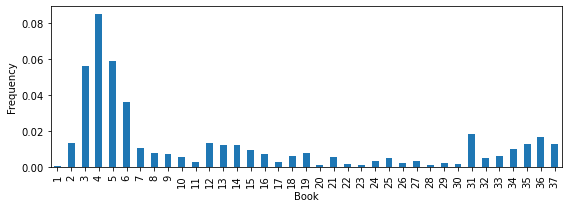

In [13]:
#| label: fig-place_distribution
#| fig-cap: Normalized distribution of place names in *Natural History*

fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figsize to increase the plot size

place_distribution['Place_freq'].plot.bar(ax=ax)
plt.xlabel('Book')
plt.ylabel('Frequency')

# Adjust the plot alignment
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Change the rect values to adjust the alignment

plt.show()

### Text source for the study 
*Natural History* is originally written in Latin. For the purpose of this study, an English translation conducted by Henry T. Riley (1816-1878) and John Bostock (1773-1846), which was first published in 1855, is utilized. The translated text is obtained in a digitized version from the [TOPOSText project](https://topostext.org/the-project), having been sourced from the Perseus Project and governed by a Creative Commons Attribution-Share-Alike 3.0 U.S. License.

Annotations of people's name, places' name and geographical coordinates are available together with the text of *Natural History* ([Book1-11](https://topostext.org/work/148), [Book12-37](https://topostext.org/work/153)) on [TOPOSText project](https://topostext.org/the-project). This invaluable resource allows for the creation of a dataset that includes both the textual contents and geographical annotations, which can be utilized to investigate the distribution of place names in the entire text and examine the frequencies and patterns of geography-related content.

The extension of the extracted corpora and the workflow of the extraction will be further explained in the Methodology chapter (@sec-methodology).

## Research Question {#sec-research_question}

### Prominent mentioned places in *Natural History*

In [40]:
place_number = len(geotext_whole['ToposText_ID'].unique().tolist())

display(Markdown("""
Based on the geographical annotations in *Natural History* provided by TOPOSText project,
there are {place_number} unique places mentioned in *Natural History*.
""".format(place_number = place_number)))


Based on the geographical annotations in *Natural History* provided by TOPOSText project,
there are 2052 unique places mentioned in *Natural History*.


The top 20 most frequent place names mentioned (as 1% of total) in *Natural History* is shown in @tbl-topplace.

In [10]:
#| label: tbl-topplace
#| tbl-cap: Top 20 mentioned place names in Natural History
#| df-print: tibble

## sort the top 1% places referred in descending order

place = geotext_whole.groupby('ToposText_ID')[['Place_Name','Lat','Long']].value_counts().reset_index(name='Count')
sorted_place = place.sort_values(by='Count', ascending=False)
top_count = sorted_place.iloc[19]['Count']
topplace = sorted_place[sorted_place['Count'] >= top_count]
topplace

ToposText_ID  \
1687  https://topostext.org...   
2034  https://topostext.org...   
52    https://topostext.org...   
82    https://topostext.org...   
57    https://topostext.org...   
320   https://topostext.org...   
255   https://topostext.org...   
109   https://topostext.org...   
2282  https://topostext.org...   
766   https://topostext.org...   
275   https://topostext.org...   
7     https://topostext.org...   
417   https://topostext.org...   
966   https://topostext.org...   
2043  https://topostext.org...   
298   https://topostext.org...   
2241  https://topostext.org...   
1839  https://topostext.org...   
1480  https://topostext.org...   
17    https://topostext.org...   
545   https://topostext.org...   
602   https://topostext.org...   

     Place_Name      Lat  \
1687      Italy  40.6000   
2034       Rome  41.8910   
52        Egypt  27.1000   
82        India  30.0000   
57       Arabia  28.0000   
320       Syria  35.5000   
255      Cyprus  35.0000   
109        Nile  30.0918   
2282       Alps  44.1420   
766      Sicily  37.6000   
275       Crete  35.2052   
7      Ethiopia  13.0100   
417      Rhodes  36.4408   
966      Athens  37.9718   
2043    Capitol  41.8933   
298   Euphrates  35.2791   
2241     Pontus  43.5000   
1839   Campania  41.1000   
1480    Armenia  39.7020   
17      Red Sea  19.5000   
545    Carthage  36.8500   
602     Cilicia  37.0100   

          Long  Count  
1687  16.30000    292  
2034  12.48600    269  
52    30.70000    261  
82    74.00000    167  
57    40.00000    123  
320   39.00000    109  
255   33.00000     85  
109   31.23130     85  
2282   7.34300     82  
766   14.50000     71  
275   25.18360     64  
7     35.01000     58  
417   28.22440     56  
966   23.72793     56  
2043  12.48300     52  
298   40.27080     47  
2241  33.50000     47  
1839  14.60000     46  
1480  44.29800     45  
17    39.00000     42  
545   10.32000     42  
602   34.01000     42

The place names referenced in *Natural History* are geographically mapped, with each location marked on the map using its corresponding coordinates. A dot is assigned to represent each place, with the size and color of the dot reflecting the frequency of its mention in the book. The larger and darker the dot, the more frequently the place is referenced within the context of Natural History.

An intriguing observation from the output, as depicted in @fig-geonamemap_pdf, is the prominence of India, a region outside the Mediterranean, despite its high frequency of mentions.

In [15]:
#| output: false
#| label: fig-geonamemap
#| fig-cap: Place name distribution map

import folium
from branca.colormap import LinearColormap

# Create a Folium map centered on a specific location
map = folium.Map(location=[32, 53], zoom_start=3)

# Define the minimum and maximum count values for the color scale
min_count = place['Count'].min()
max_count = place['Count'].max()

# Create a color map based on the count values
color_map = LinearColormap(colors=['#FFCC00', '#FF6600'],
                           vmin=min_count,
                           vmax=max_count)

# Iterate over each row in the dataframe
for index, row in place.iterrows():
    place_name = row['Place_Name']
    count = row['Count']
    latitude = row['Lat']
    longitude = row['Long']
    
    # Get the color based on the count using the color map
    color = color_map(count)
    
    # Create a circle marker with a size based on the count and color based on the count
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=count/10,  # Adjust the size of the marker based on the count
        weight=0,
        fill=True,
        fill_color=color,
        fill_opacity=1,
        tooltip=f'{place_name}: {count} counts'
    ).add_to(map)

# Add the color scale to the map
color_map.caption = 'Count'
color_map.add_to(map)

# Display the map
map

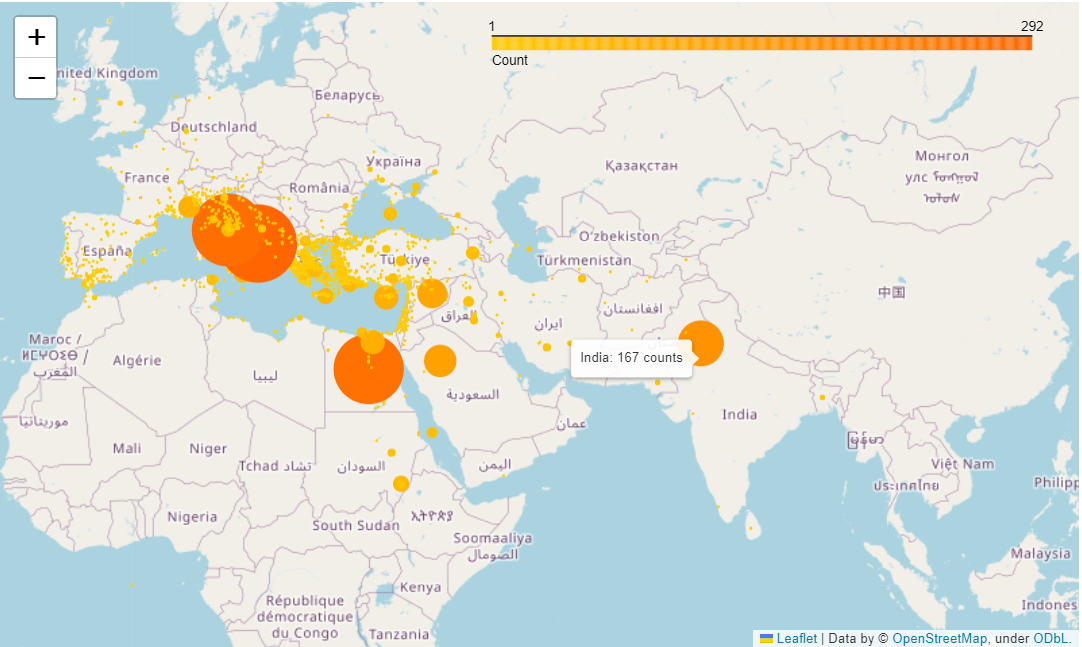

In [30]:
#| label: fig-geonamemap_pdf
#| fig-cap: Place name distribution map

from IPython.display import Image
Image(filename='map_forpdf.png')

### Why India?

Geographically, India presents itself as a distant and disconnected territory from the Roman Empire, lacking any direct aquatic or land routes with the Mediterranean region. Despite this apparent physical separation, the exotic curiosity Pliny attempted to integrate, as well as the Indo-roman goods exchange network reflected in the work, may contribute to an explaination of the prominent mentioning of India in *Natural History* as the broader context. 

As suggested by [@murphy2003], the *mirabilia*, encompassing accounts of extraordinary landscapes, peoples, plants, and animals, assumes a substantial proportion within the books of *Natural History*. Pliny's inclusion of such exotic elements not only catered to the prevailing curiosity of his Roman readers but also fostered a comparative perspective between distant locales, exemplified by his references to India, and their natural counterparts within Rome [@naas2011]. Within research framework of Roman Imperialism, the detailed portrayal of foreign lands, such as India, holds significant importance in shaping both Pliny's and his contemporary Roman readers' perception of their place within the global landscape [@pollard2009].

In addition, *Natural History* serves as a valuable reference for tracking the Indo-Mediterranean network of exchange [@pollard2009]. Through the depiction of cities, ports, and rivers along the trade routes, the work provides substantive evidence of the flourishing trade relations between the Roman Empire and the Indian subcontinent [@neelis2011]. The extensive exemplify of diverse commodities, such as gemstones, glass, spices, textiles, plants, wine, along with the accounts of the currency *sestertii* involved in the merchandise exchange in the work shed lights to the compelling details and social and cultural implications of this long-distance trade [@szekely2006; @pollard2009]. Furthermore, the direct criticisms regarding the high cost for the luxury items imported from India implies both the magnitude of the trade volume and Pliny's stance towards this commercial interaction [@neelis2011].

### India-related text as a case study

In light of the observations and foundational research mentioned above, the present study centers its investigation on the spatial perspective within Pliny's *Natural History*, with a specific focus on the texts pertaining to India, seeking to delve into the discourse surrounding this region. To achieve this goal, distant reading methodologies, including statistical analysis, topic modeling, and social network analysis, will be employed.

The main aim of this study is to explore how is India described, and how is the information about India structured in *Natural History*, which may also contribute to a more profound comprehension of the inherent complexity and interconnectivity that permeates this monumental work.

## Methodology {#sec-methodology}

### Workflow

The workflow for this study involved the following key stages: 

**Data Collection**:

As mentioned in the Introduction chapter (@sec-introduction), the text employed for this study is obtained from the digitized English translation (by Henry T. Riley (1816-1878) and John Bostock (1773-1846)) of Pliny's *Natural History* available on [TOPOSText project](https://topostext.org/the-project). 

The two parts of *Natural History* ([Book1-11](https://topostext.org/work/148), [Book12-37](https://topostext.org/work/153)) are scraped for their the textual contents together with the annotated information of the geographical coordinates of the ancient places mentioned in the work, and the book, chapter and paragraph affiliations with the function provided in [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library of Python. 


**Data Preprocessing**:

The information extracted from the html is structured into separate columns as [Pandas](https://pandas.pydata.org/) dataframe, a dataframe for plain text of the entire work, and a dataframe for geographical-related text in *Natural History* with the geographical annotations are generated and stored in CSV format respectively.

After a preliminary exploration, the research focus is narrowed down to India-related text in *Natural History*. With a reference to the geographical territories in the consideration of ancient Greek and Roman world [@talbert2000], a dataframe for India-related text is filtered from the abovementioned dataframe for geographical-related text with the range of geographical coordinates of India subcontinent in the era of *Natural History*. The flitered India-related text dataframe is also stored in CSV format.

The location names mentioned in the India-related text were checked manually for its completeness. If any location names were identified and not being annotated in the TOPOSText, they were added to the India-related text dataset.

Additionally, the textual contents in the datasets were processed to make them suitable for textual analysis. This processing involved tokenization, lemmatization and the exclusion of stop-words.

**Data Analysis**:

Statistical analysis is conducted in the preliminary exploration of the extracted dataframes. A nomalized frequency of geographical name occurence in each book is calculated for an overview of the place name distribution in *Natural History*. And the top 1% prominently mentioned place names in the entire work are sorted out with the time of their occurencies. The specific attention on India-related text as a case study is drown from this initial observation.

In the analysis of the India-related text (target corpus) in *Natural History*, three analysis methods are employed:

1. Word frequency: single word frequency and bi-gram collocation of the target corpus are measured with the functions in [NLTK](https://www.nltk.org/) package for an overview of the keywords relating to India in *Natural History*.

2. Topic modeling: [Genism](https://radimrehurek.com/gensim/) library is used for semantic vectorization and implemetion of  Latent Dirichlet Allocation (LDA) model for the topic modeling of the India-ralated text, and the library of [pyLDAvis](https://pyldavis.readthedocs.io/en/latest/index.htmlgenism) is utilized for an interactive visualization. The output of this method shows the potential topics in the India-related text in *Natural History*.

3. Network analysis for Named Entities: Person names mentioned in the target corpus are retrieved from the tagging of the text given by the pretrained multilingual Named Entity Recognition model [Flair](https://huggingface.co/flair). The person name entities are cross checked with the annotation on TOPOSText. Stone names, river names, mountain names, person names and the book number are extracted as nodes, and the co-occurence between the nodes are calculated as edges for network analysis. The output of this method is a graph showing the clusters of the nodes in the target corpus, indicating the structure of the content related to India in *Natural History*.


**Interpretation and Conclusion**:

The workflow and parameter setting of each research method is explained in the beginning of each analysis section. The results aquired from each method is interpreted with a dialouge to the broader literature and close reading of the related text.

In the Conclusion chapter, the findings are illustrated comprehensively in the context of the research questions. And the limitations of each method is discussed and evaluated.

### Data preparation

The present section provides an overview of the data preparation process, encompassing three sub-sections: HTML scraping from TOPOSText, creation of a filtered dataset of "India-related text," completeness checks and preprocessing of textual data. The tools and procedures employed in data collection and dataset generation for the study are elucidated in the subsequent content.

#### HTML scraping  from TOPOSText

As previously stated, the textual contents of Pliny's *Natural History* are available on the [TOPOSText project](https://topostext.org/the-project), presented in two distinct parts: [Book1-11](https://topostext.org/work/148), [Book12-37](https://topostext.org/work/153). Both parts are provided in HTML format, offering separate sections of the complete work.

To extract the relevant data, the [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) tool, a Python library renowned for parsing HTML and XML documents, was employed. This process involved navigating the HTML structure effectively to retrieve essential information.

The text in the HTML documents is organized into paragraphs, each uniquely identified by an "id" attribute that specifies its corresponding book, chapter, and paragraph number. For instance, a typical paragraph has an "id" tag as follows: 

**\<p id='urn:cts:latinLit:phi0978.phi001:3.9.7'>** 

Utilizing these "id" attributes, the paragraphs were meticulously associated with their respective book, chapter, and paragraph information.

As a result of this data extraction process, a reference dataset was obtained, comprising the plain text of *Natural History* divided into paragraphs, with each paragraph assigned a unique identifier, and separate columns indicating its affliated book, chapter, and paragraph number. An illustrative example of the dataset's structure can be refered as @tbl-dataset_plaintext.

In [3]:
#| df-print: tibble
#| label: tbl-dataset_plaintext
#| tbl-cap: Example for the reference dataset containing the plain text in paragraphs of *Natural History*
#pd.set_option('max_colwidth', 40)
#pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_colwidth = 15
wholebook.head()

UUID4       Reference  Book  Chapter  Paragraph            Text
0  e9e67565-bb...  urn:cts:lat...     1        1        1.0  PREFACE IN ...
1  010b853d-b8...  urn:cts:lat...     1        2        1.0  But who cou...
2  2d10e332-9c...  urn:cts:lat...     1        3        1.0  But if Luci...
3  113e0b4c-5b...  urn:cts:lat...     1        4        1.0  My own pres...
4  19115032-9f...  urn:cts:lat...     1        5        1.0  For my own ...

In [4]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def tokenize_paragraphs(texts):
    ## apply word tokenization function of NLTK module to each paragraph
    words = [word_tokenize(text, language='English') for text in texts]
    
    
    ## set list of stop words to be excluded from the tokenlist with stopwords function in NLTK
    stop_words = set(stopwords.words('English'))
    
    lemmatizer = WordNetLemmatizer()
    
    ## append words of text into a tokenlist
    tokenlistpara = []
    for paragraph in words:
        paragraph_tokens = []
        for token in paragraph:
            if token.lower() and token.lower() not in stop_words and len(token.lower()) > 2:
                ## lemmatize the tokens
                lemmatized_token = lemmatizer.lemmatize(token.lower())
                paragraph_tokens.append(lemmatized_token)
        tokenlistpara.append(paragraph_tokens)
    return tokenlistpara

In [5]:
# function for token and type counting for the given corpus

from collections import Counter
import nltk
nltk.download('punkt')
import string

def tokencounter(text):
    # Tokenize the text, including punctuation marks
    tokenlist = [word for paragraph in tokenize_paragraphs(text) for word in paragraph]
    
    token_counts = len(tokenlist)
    type_counts = len(set(tokenlist))
    
    return token_counts, type_counts

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dawn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#| echo: false

totalpara = len(wholebook)
wholetoken = tokencounter(wholebook['Text'])[0]
wholetype = tokencounter(wholebook['Text'])[1]

display(Markdown("""There are a total of {totalpara} paragraphs in the English translated version of 
*Natural History* used in this study. The extracted text contains {wholetoken} tokens and {wholetype} types after preprocessed.
This reference dataset has been saved in CSV format for record.""".format(totalpara = totalpara,wholetoken = wholetoken, wholetype = wholetype )))

There are a total of 3493 paragraphs in the English translated version of 
*Natural History* used in this study. The extracted text contains 343096 tokens and 28606 types after preprocessed.
This reference dataset has been saved in CSV format for record.

Moreover, the geographical annotations concerning the ancient places mentioned in the text are labeled with a class attribute denoted as "place", exemplified by the following HTML code snippet: 

**\<a about="https://topostext.org/place/419125LPal" class="place" lat="41.8896" long="12.4884">Palatine\</a>**

To compile a comprehensive dataset encompassing all the annotated ancient places, along with their corresponding geographical coordinates and contextual information (such as book, chapter, and paragraph numbers), all annotations under the "place" class are extracted. This dataset enables an analysis of the distribution of place names within *Natural History*.

As certain places may possess multiple names, ToposText_ID, which is the unique identifier assigned to distinct places available on TOPOSText is also extracted as a reference information. An example of the dataset presenting the geographical-related text in *Natural History* is provided in @tbl-dataset_geotext for reference.

In [21]:
#| df-print: tibble
#| label: tbl-dataset_geotext
#| tbl-cap: Example for the geographical-related text dataset
#| fontsize: 8pt

#pd.set_option('max_colwidth', 10)
#pd.set_option('display.expand_frame_repr', False)
pd.options.display.width = 6
#pd.options.display.max_colwidth = 15
#pd.options.display.multi_sparse = False
#pd.options.display.latex.repr=True
#pd.options.display.max_colwidth = 8
geotext_whole.head()

UUID4  \
0  bf12...   
1  f782...   
2  a0f9...   
3  b8d8...   
4  f81b...   

  ToposText_ID  \
0  http...       
1  http...       
2  http...       
3  http...       
4  http...       

  Place_Name  \
0  Academy     
1  Pala...     
2  Esqu...     
3  Capitol     
4     Rome     

  Reference  \
0  urn:...    
1  urn:...    
2  urn:...    
3  urn:...    
4  urn:...    

       Lat  \
0  37.9920   
1  41.8896   
2  41.8950   
3  41.8933   
4  41.8910   

      Long  \
0  23.7070   
1  12.4884   
2  12.4960   
3  12.4830   
4  12.4860   

   Book  \
0     1   
1     2   
2     2   
3     2   
4     2   

   Chapter  \
0        8   
1        5   
2        5   
3        5   
4        6   

   Paragraph  \
0      1.0     
1      1.0     
2      1.0     
3      1.0     
4      3.0     

      Text  
0  For ...  
1  For ...  
2  For ...  
3  For ...  
4  Belo...

In [79]:
#| output: false

# check the place names with annotation in the two parts of the digitized text

def geo_annotation_extract(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, features="lxml")
    links = soup.find_all("a", {"class": "place"})
    return links

print(len(geo_annotation_extract(url1)), len(geo_annotation_extract(url2)))

5595 3281


In [6]:
#| echo: false

loc_book1 = len(geodf1)
loc_book2 = len(geodf2)
loc_whole = len(geotext_whole)


geotoken = tokencounter(geotext_whole['Text'].drop_duplicates())[0]
geotype = tokencounter(geotext_whole['Text'].drop_duplicates())[1]

display(Markdown("""According to the geographical annotations of the ancient places occured in *Natural History*, 
there are {loc_book1} occurences of place names in book 1-11 and {loc_book2} in book 12-37, 
adding up to a combined total of {loc_whole} annotated places throughout the work.
The geographical-related text in *Natural History* contains {geotoken} tokens and {geotype} types after preprocessed.
This dataset including place names and their textual context in *Natural History* is saved in CSV format for record."""
.format(loc_book1 = loc_book1, loc_book2 = loc_book2, loc_whole = loc_whole, geotoken = geotoken, geotype = geotype)))

According to the geographical annotations of the ancient places occured in *Natural History*, 
there are 5595 occurences of place names in book 1-11 and 3281 in book 12-37, 
adding up to a combined total of 8876 annotated places throughout the work.
The geographical-related text in *Natural History* contains 199507 tokens and 23937 types after preprocessed.
This dataset including place names and their textual context in *Natural History* is saved in CSV format for record.

#### Filtered dataset of "India-related text"

As outlined in the Research Question chapter (@sec-research_question), this thesis examines texts concerning the Indian region in Pliny's *Natural History* as a case study. The objective is to explore how India is described, portrayed, and imagined within this extensive work, providing valuable insights into its complexity.

To ensure a comprehensive contextual analysis, the dataset creation considers not only instances where the word "India" is directly mentioned but also text related to the Indian region. This broader approach aims to encompass a wider scope of relevant information. Drawing from the research and mapping of the Indian region in the perception of the ancient Greek and Roman world, as explained and manifested in the *Barrington Atlas of the Greek and Roman World* [@talbert2000-1; @talbert2000], the approximate coordinates defining the target region are as follows^[As indicated in the map-by-map directory, the range spans territories of "modern states of India (minus the Punjab), Bangladesh, Bhutan, Burma, Nepal, and Sri Lanka".]:

- Latitude: 5-35 degrees North
- Longitude: 65-95 degrees East

Utilizing the aforementioned dataset of geographical-related text in *Natural History*, the text having annotations with geographical coordinates falling within the specified range are extracted to construct a dataset relevant to the discourse about Indian region in the work. The filtering process ensures not only the text explicitly mentioning "India" but also those including other place names situated within the defined boundaries of the Indian region were retained. 

The new dataset comprises the textual content as well as the geographical coordinates of the mentioned Indian place in *Natural History*. An example of the structure of the dataset of India-related text is showed as @tbl-dataset_indiatext.

In [2]:
#| df-print: tibble
#| label: tbl-dataset_indiatext
#| tbl-cap: Example for the India-related dataset
#| fontsize: 8pt
# convert the 'Lat' and 'Long' information in the original dataframe to numeric format
geotext_whole['Lat'] = geotext_whole['Lat'].astype(float)
geotext_whole['Long'] = geotext_whole['Long'].astype(float)

# define the filter range of latitude and longitude ranges for Indian subcontinent
lat_range = (5, 35)
long_range = (65, 95)

# create a boolean mask for filtering
mask = (geotext_whole['Lat'].between(*lat_range)) & (geotext_whole['Long'].between(*long_range))

# apply the mask to filter the dataframe
geotext_india = geotext_whole[mask]
geotext_india.to_csv('geotext_indianregion.csv')

geotext_india.head()

UUID4  \
85   db4c15ee-2b98-431c-8e9d-3178e0a8d243   
92   02c5b989-216d-4bc7-8674-fd6b837795df   
93   1a60ecc5-81d5-45c8-83fd-f2a3e1d90fe9   
218  4545e749-5ff0-431b-9a29-1bc351f19a99   
343  779b6add-68d5-42fa-b26c-65501432f819   

                               ToposText_ID Place_Name  \
85   https://topostext.org/place/300740RInd      India   
92   https://topostext.org/place/300740RInd      India   
93   https://topostext.org/place/300740RInd      India   
218  https://topostext.org/place/254683WInd      Indus   
343  https://topostext.org/place/300740RInd      India   

                                   Reference      Lat     Long  Book  Chapter  \
85    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
92    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
93    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
218   urn:cts:latinLit:phi0978.phi001:2.98.1  25.4487  68.3192     2       98   
343  urn:cts:latinLit:phi0978.phi001:2.112.1  30.0000  74.0000     2      112   

     Paragraph                                               Text  
85         1.0  Similarly it is reported that at the town of S...  
92         1.0  Similarly it is reported that at the town of S...  
93         1.0  Similarly it is reported that at the town of S...  
218        1.0  Near the town of Harpasa in Asia stands a jagg...  
343        1.0  Our own portion of the earth, which is my subj...

In [9]:
#| echo: false

indiatext_place = len(geotext_india)
distinct_places = geotext_india['Place_Name'].unique()

indiatoken = tokencounter(geotext_india['Text'].drop_duplicates())[0]
indiatype = tokencounter(geotext_india['Text'].drop_duplicates())[1]

display(Markdown("""
There are {indiatext_place} occurrences of paragraphs mentioning the 
places in Indian region with geographical coordinates annotation. And the distinct places mentioned are {distinct_places}. 
The textual content pertaining India compiles {indiatoken} tokens and {indiatype} types after preprocessed.
The dataset and corpus for India-related text in *Natural History* are saved respectively in CSV format for further reference.
""".format(indiatext_place = indiatext_place, distinct_places = distinct_places, indiatoken = indiatoken, indiatype = indiatype)))


There are 229 occurrences of paragraphs mentioning the 
places in Indian region with geographical coordinates annotation. And the distinct places mentioned are ['India' 'Indus' 'Ganges' 'Acesinus' 'Hydaspes' 'Taprobane' 'Arachosia'
 'Muziris' 'Baragaza' 'Ceylon']. 
The textual content pertaining India compiles 18029 tokens and 5384 types after preprocessed.
The dataset and corpus for India-related text in *Natural History* are saved respectively in CSV format for further reference.


#### Data completeness check

The paragraphs extracted from the India-related text dataset undergo manual verification for the completeness of Indian place name annotations. Each distinct paragraph in the dataset is individually extracted and stored in TXT format as separate files within a corpus folder. The file names contain information about the affiliating book, chapter, and paragraph numbers. 

In [39]:
geotext_india['Affiliation'] = geotext_india['Reference'].str.extract(r':(\d+\.\d+\.\d+)$')
india_corpus = geotext_india[['Affiliation', 'Text']].drop_duplicates(subset='Text').reset_index(drop=True)
india_corpus['Text'] = india_corpus['Text'].str.lower()

india_corpus_size = len(india_corpus)

display(Markdown("""There are in total {india_corpus_size} distinct paragraghs metioning India places in *Natural History* 
accroding to the annotations on TOPOSText."""
.format(india_corpus_size = india_corpus_size)))

C:\Users\dawn\AppData\Local\Temp\ipykernel_6748\1076211413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geotext_india['Affiliation'] = geotext_india['Reference'].str.extract(r':(\d+\.\d+\.\d+)$')


There are in total 146 distinct paragraghs metioning India places in *Natural History* 
accroding to the annotations on TOPOSText.

An example of the exported file name can be referred as follows:

In [34]:
import os

output_folder = "india_corpus"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for _, row in india_corpus.iterrows():
    chapter_paragraph = row['Affiliation']
    text = row['Text']
    filename = os.path.join(output_folder, f"{chapter_paragraph}_text.txt")
    
    with open(filename, 'w', encoding = 'utf-8') as file:
        file.write(text)

# print the last exported filename for check     
print(f"Exported {filename}")

Exported india_corpus\37.77.1_text.txt


The text files are uploaded to [Recogito](https://recogito.pelagios.org/) platform, which offers a semantic annotation tool and automatic geographical annotation suggestions from its supported gazetteers. This process is used to find Indian place names mentioned in the text paragraphs related to India that were not annotated in TOPOSText. These unidentified place names are then marked on the [Recogito](https://recogito.pelagios.org/) workspace with the available geographical coordinates information as additional annotations. And the identified annotations are exported in CSV format for supplement to the dataset of India-related text in *Natural History*.

As shown in @tbl-supplement_annotation, the supplement annotations are organized in the following manner:

**FILE**: This column contains the name of the file indicating the book, chapter, and paragraph number where the mentioned place name appears.

**QUOTE_TRANSCRIPTION**: This column contains the textual name of the place as mentioned in the text.

**URI**: The URI column contains the geographical information obtained from the gazetteers available on the [Recogito](https://recogito.pelagios.org/) platform. The URI provides a unique identifier for the specific location.

**VOCAB_LABEL**: This column contains the confirmed automatically matched geographical name with the corresponding place name mentioned in the text.

**LAT&LNG**: The LAT and LNG columns represent the geographical coordinates (latitude and longitude) associated with the marked place name. Note that some marked names may not have matching coordinates.

**PLACE_TYPE**: This column contains the automatically matched geographical role provided by the gazetteers. It describes the type of place the name represents.

**VERIFICATION_STATUS**: The VERIFICATION_STATUS column indicates whether the place names have been "verified" with confirmed coordinates that match the gazetteers' information.

**COMMENTS**: The COMMENTS column includes manual remarks for the place names that do not have matching coordinates but are believed to indicate Indian place names based on the context.

In [18]:
#| label: tbl-supplement_annotation
#| tbl-cap: Example for supplement annotation to Indian places in *Natural History*
#| tbl-colwidths: [5,5,5,10,10,5,5,5,5,45]

india_supp = pd.read_csv('recogito_india.csv')
india_supp_place = india_supp.loc[india_supp ['TYPE']=='PLACE']
india_supp_place[['FILE','QUOTE_TRANSCRIPTION','TYPE','URI','VOCAB_LABEL','LAT','LNG','PLACE_TYPE','VERIFICATION_STATUS','COMMENTS']].head()

FILE QUOTE_TRANSCRIPTION   TYPE  \
0  2.75.1_text.txt             hypasis  PLACE   
3  6.21.4_text.txt              sydrus  PLACE   
4  6.21.4_text.txt            rhodapha  PLACE   
5  6.21.4_text.txt          palibothra  PLACE   
6  6.21.5_text.txt              prinas  PLACE   

                                     URI  \
0  http://pleiades.stoa.org/places/60110   
3  http://pleiades.stoa.org/places/60110   
4  http://pleiades.stoa.org/places/60019   
5  http://pleiades.stoa.org/places/59978   
6  http://pleiades.stoa.org/places/60008   

                                       VOCAB_LABEL        LAT        LNG  \
0                  Zadadros/Hypasis/Sydrus (river)  32.500000  72.500000   
3                  Zadadros/Hypasis/Sydrus (river)  32.500000  72.500000   
4                                         Rhodopha  27.500000  77.500000   
5  Palibothra|Palibothra, Patna Skt.: Paṭaliputra  25.614443  85.135020   
6                                   Prinas (river)  25.621435  86.511556   

   PLACE_TYPE VERIFICATION_STATUS  \
0       river            VERIFIED   
3       river            VERIFIED   
4     unknown            VERIFIED   
5  settlement            VERIFIED   
6       river            VERIFIED   

                                            COMMENTS  
0                                                NaN  
3                                                NaN  
4  A river in India, mentioned by Pliny\nhttps://...  
5                                                NaN  
6                                                NaN

In [194]:
india_supp_place['UUID'].groupby(india_supp_place['PLACE_TYPE']).count().sort_values(ascending = False)

PLACE_TYPE
river                   14
settlement              13
island                   6
unknown                  4
cape                     3
mountain                 2
people                   2
lake                     1
unlocated                1
unlocated,river          1
unlocated,settlement     1
Name: UUID, dtype: int64

In [195]:
anno_count = len(india_supp_place)
anno_co = india_supp_place['LAT'].notnull().sum()
anno_nonco = india_supp_place['LAT'].isna().sum()


display(Markdown("""After the mannual annotation process, {anno_count} Indian place names 
were identified and can be added as supplementary annotations to the existing dataset, most of which are names of rivers,
settlements, and islands.
Among these, {anno_co} place names have confirmed geographical coordinates based on the reference in Recogito. 
For the other {anno_nonco} place names, though have no matching coordinates on Recogito, 
there are contextual clues indicating that they are probably Indian location names."""
.format(anno_count = anno_count, anno_co = anno_co, anno_nonco = anno_nonco)))

After the mannual annotation process, 56 Indian place names 
were identified and can be added as supplementary annotations to the existing dataset, most of which are names of rivers,
settlements, and islands.
Among these, 45 place names have confirmed geographical coordinates based on the reference in Recogito. 
For the other 11 place names, though have no matching coordinates on Recogito, 
there are contextual clues indicating that they are probably Indian location names.

In [203]:
#| output: false

india_supp_place['QUOTE_TRANSCRIPTION']=india_supp_place['QUOTE_TRANSCRIPTION'].str.capitalize()
india_supp_place['FILE_ID'] = india_supp_place['FILE'].str.extract(r'(\d+\.\d+\.\d+)')
india_supp_place = india_supp_place[['FILE_ID', 'URI', 'QUOTE_TRANSCRIPTION', 'LAT', 'LNG']]
india_supp_place.set_index('FILE_ID', inplace=True)

column_name_mapping = {
    'URI': 'Place_URI',
    'QUOTE_TRANSCRIPTION': 'Place_Name',
    'LAT': 'Lat',
    'LNG': 'Long'
}

# Use the rename() method to change column names
india_supp_place.rename(columns=column_name_mapping, inplace=True)

india_extract = geotext_india.iloc[:,1:]
india_extract['FILE_ID'] = india_extract['Reference'].str.extract(r'(\d+\.\d+\.\d+)')
india_extract.set_index('FILE_ID', inplace=True)
india_extract.rename(columns={'ToposText_ID': 'Place_URI'}, inplace=True)


india_update = pd.concat([india_extract, india_supp_place])

# Reset the index to bring back 'FILE_ID' as a column
india_update.reset_index(inplace=True)

columns_to_fill_down = ['Reference', 'Book', 'Chapter', 'Paragraph', 'Text']

# Group by 'FILE_ID' and fill down the missing values in each group
india_update[columns_to_fill_down] = india_update.groupby('FILE_ID')[columns_to_fill_down].fillna(method='ffill')

# Display the DataFrame with filled down values
india_update.sort_values(by=['Book', 'Chapter', 'Paragraph']).head()


C:\Users\dawn\AppData\Local\Temp\ipykernel_828\2214672675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_supp_place['QUOTE_TRANSCRIPTION']=india_supp_place['QUOTE_TRANSCRIPTION'].str.capitalize()
C:\Users\dawn\AppData\Local\Temp\ipykernel_828\2214672675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_supp_place['FILE_ID'] = india_supp_place['FILE'].str.extract(r'(\d+\.\d+\.\d+)')
C:\Users\dawn\AppData\Local\Temp\ipykernel_828\2214672675.py:16: SettingWithCopyWarning: 
A value is trying 

FILE_ID                               Place_URI Place_Name  \
0    2.75.1  https://topostext.org/place/300740RInd      India   
1    2.75.1  https://topostext.org/place/300740RInd      India   
2    2.75.1  https://topostext.org/place/300740RInd      India   
229  2.75.1   http://pleiades.stoa.org/places/60110    Hypasis   
3    2.98.1  https://topostext.org/place/254683WInd      Indus   

                                  Reference      Lat     Long  Book  Chapter  \
0    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000   2.0     75.0   
1    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000   2.0     75.0   
2    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000   2.0     75.0   
229  urn:cts:latinLit:phi0978.phi001:2.75.1  32.5000  72.5000   2.0     75.0   
3    urn:cts:latinLit:phi0978.phi001:2.98.1  25.4487  68.3192   2.0     98.0   

     Paragraph                                               Text  
0          1.0  Similarly it is reported that at the town of S...  
1          1.0  Similarly it is reported that at the town of S...  
2          1.0  Similarly it is reported that at the town of S...  
229        1.0  Similarly it is reported that at the town of S...  
3          1.0  Near the town of Harpasa in Asia stands a jagg...

In [197]:
indiatext_place_new = len(india_update)
distinct_places_new = india_update['Place_Name'].unique()

display(Markdown("""The supplemented place name annotations were added to the India-related text dataset.
The updated dataset contains {indiatext_place_new} occurrences of paragraphs mentioning Indian places. 
And the distinct places mentioned are {distinct_places_new}."""
.format(indiatext_place_new = indiatext_place_new, distinct_places_new = distinct_places_new)))


The supplemented place name annotations were added to the India-related text dataset.
The updated dataset contains 285 occurrences of paragraphs mentioning Indian places. 
And the distinct places mentioned are ['India' 'Indus' 'Ganges' 'Acesinus' 'Hydaspes' 'Taprobane' 'Arachosia'
 'Muziris' 'Baragaza' 'Ceylon' 'Hypasis' 'Sydrus' 'Rhodapha' 'Palibothra'
 'Prinas' 'Cainas' 'Condochates' 'Erannoboas' 'Cosoagus' 'Sonus'
 'Protalis' 'Peucolaitis' 'Taxilla' 'Modogalinga' 'Andarae' 'Dardae'
 'Methora' 'Chrysobora' 'Dandaguda' 'Tropina' 'Patala' 'Capitalia'
 'Automula' 'Amenda' 'Cantaba' 'Prasiane' 'Argyre' 'Crocala' 'Bibraga'
 'Toralliba' 'Hippuros' 'Palaesimundus' 'Megisba' 'Palesimundus' 'Cydara'
 'Coliacum' 'Emodian mountains' 'Capisa' 'Parabeste' 'Cartana' 'Tonberos'
 'Arosapes' 'Gedrusi' 'Arbis' 'Sigerus' 'Catarcludi' 'Meros' 'Perimula'
 'Chenab' 'Oratae'].

#### Preprocessing of texts

The textual contents stored in the "TEXT" column of the mentioned datasets are utilized as corpora for different analyses with three distinct scales: the entire work's text, text specifically related to geographical content, and text related to Indian content. To prepare the data for analysis, a preprocessing process is applied using a defined function, which employs tools from the [NLTK](https://www.nltk.org/) package.

During the preprocessing, the texts are tokenized, preserving punctuation marks, and lemmatized to their base forms. Furthermore, common English stopwords are excluded from the corpus, considering the text is in an English translation version. To reduce noise of short strings, tokens with length lower than two will not be appended to the output token list. The output of this preprocessing is a refined corpus presented as a nested list structure, with paragraphs forming the smallest nesting unit.

The size computed for each corpus mentioned earlier corresponds to the outcome of this preprocessing procedure. By preprocessing the data, the corpora are optimally organized, ensuring that they are conducive to meaningful analyses and facilitating the extraction of valuable insights from the text at varying scales.

## Data Analysis

### Place name distribution in India-related text

The comparison between the total number of place names and the place names specifically related to the Indian subcontinent mentioned in each book, is depicted in @fig-grouped_place_name_count_comparison. The difference in numbers between the two categories is significant, as indicated by the large disparity.

To facilitate a more effective comparison of the referencing trends across different books, @fig-subplots_place_name_count_comparison presents subplots with varying y-axis scales. This approach allows for a clearer visualization of the trends and patterns in place name references throughout the various books.

In [228]:
# add the supplmented Indian places to the dataset containing all geographical annotations

india_update_count = india_update[229:].iloc[:,1:-1]
geotext_whole_count = geotext_whole[['ToposText_ID','Place_Name','Reference','Book','Lat','Long','Chapter','Paragraph']]
geotext_whole_count.rename(columns={'ToposText_ID': 'Place_URI'}, inplace=True)
geotext_whole_update = pd.concat([df2, df1])

C:\Users\dawn\AppData\Local\Temp\ipykernel_828\1633245206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geotext_whole_count.rename(columns={'ToposText_ID': 'Place_URI'}, inplace=True)


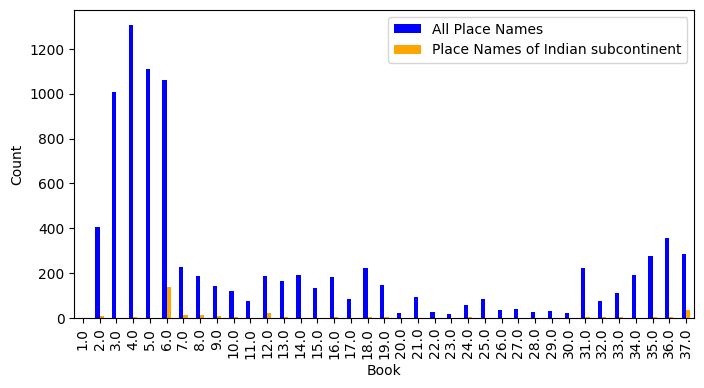

In [229]:
#| label: fig-grouped_place_name_count_comparison
#| fig-cap: Occurence count for all place names and place names of Indian subcontinent in each book

import matplotlib.pyplot as plt

# Compute the grouped count of place names in the current DataFrame
allplacecount = geotext_whole_update.groupby('Book')['Chapter'].count()

# Compute the grouped count of place names in the other DataFrame
indianplacecount = india_update.groupby('Book')['Place_Name'].count()

# Combine the counts into a single DataFrame
combined_counts = pd.concat([allplacecount, indianplacecount], axis=1)
combined_counts.columns = ['All Place Names', 'Place Names of Indian subcontinent']
combined_counts.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(8, 4))

# Plot the combined counts as a bar chart with different colors
combined_counts.plot.bar(color=['blue', 'orange'], ax=ax)


# Customize the plot
ax.set_xlabel('Book')
ax.set_ylabel('Count')

# Show the plot
plt.show()


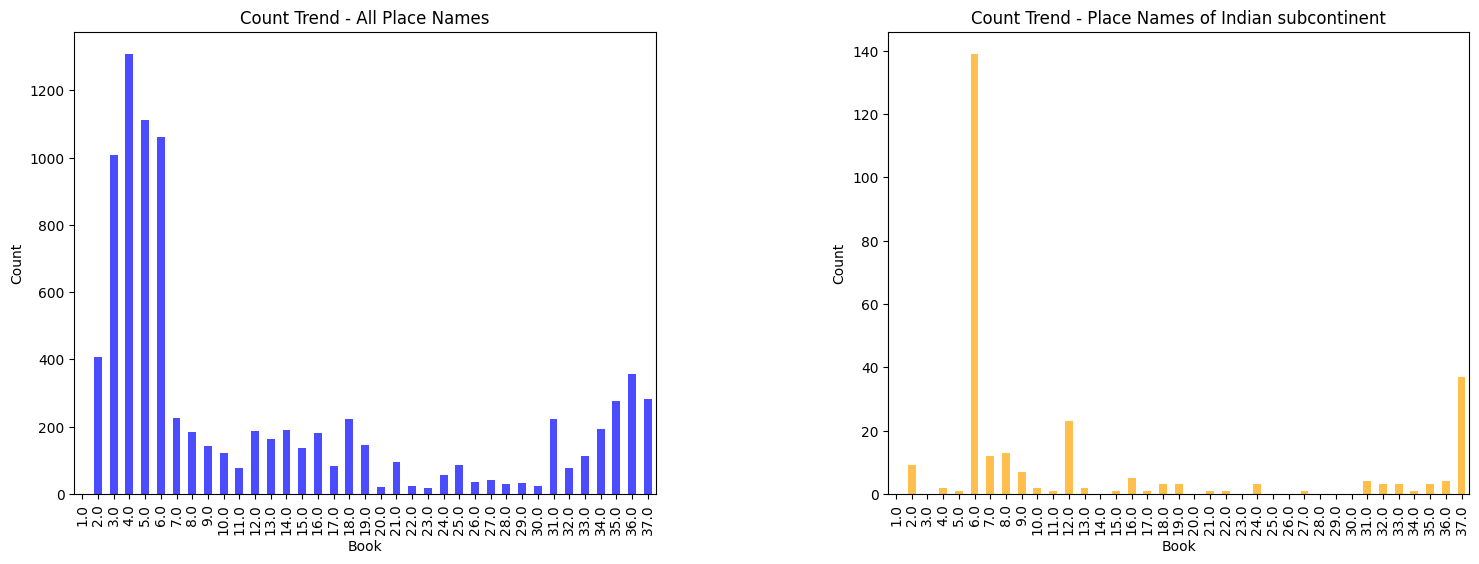

In [230]:
#| label: fig-subplots_place_name_count_comparison
#| fig-cap: Occurence count for all place names and place names of Indian subcontinent in each book_different y-axis scales 

# Set up the figure and axes for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart for 'All Place Names' on the first subplot
combined_counts['All Place Names'].plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_xlabel('Book')
ax1.set_ylabel('Count')
ax1.set_title('Count Trend - All Place Names')

# Plot the bar chart for 'Other Place Names' on the second subplot
combined_counts['Place Names of Indian subcontinent'].plot(kind='bar', ax=ax2, color='orange', alpha=0.7)
ax2.set_xlabel('Book')
ax2.set_ylabel('Count')
ax2.set_title('Count Trend - Place Names of Indian subcontinent')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

The figures reveal a distinct difference between the occurrence trends of place names related to the Indian subcontinent and all place names collectively. Specifically, the referencing of the Indian subcontinent is highly concentrated in books 6, 12, and 37 of Pliny's narrative. This discrepancy indicates that the mentioning of place names from the Indian subcontinent is closely tied to specific themes and topics within Pliny's work.

In this regard, three methodologies have been employed to analyze the texts pertaining to the Indian subcontinent in *Natural History*, including word frequency and collocation analysis, topic modeling, and network analysis. The objective of these analyses is to delve deeper into the textual content, unraveling the intricate relationships and uncovering the underlying themes and connections associated with the place names of the Indian subcontinent.

Through word frequency and collocation analysis, the aim is to identify keyword and significant word combinations co-occur in the textual content about India in *Natural History*. This analysis provides insights into the specific linguistic patterns and contextual associations surrounding the Indian places mentioned in the work, providing an overview of the keyword in the discourse.

Topic modeling allows for a broader exploration of the thematic landscape within which the Indian subcontinent place names are embedded. By clustering related words and identifying prevalent topics, this methodology helps to discern the major themes and subject matters that emerge from Pliny's narrative, providing a comprehensive understanding of the broader context in which these place names are mentioned.

Furthermore, network analysis offers a visual representation of the interconnections among the place names of the Indian subcontinent and other entities in Pliny's work. By examining the relationships between different locations and named entities, this analysis uncovers the geographical and conceptual networks that exist within the text, revealing how the Indian subcontinent place names contribute to the overall structure and narrative flow of *Natural History*.

Together, these methodologies aim to provide a nuanced and comprehensive exploration of the texts related to the Indian subcontinent in *Natural History*. By delving into the linguistic, thematic, and network aspects of these place names, a deeper understanding of their role in shaping Pliny's narrative can be achieved.

### Word frequency and collocating bi-grams

By utilizing the measurements available in the [NLTK](https://www.nltk.org/) package, a word frequency list and collocating bi-grams were generated from the text associated with Indian place names in *Natural History*. These outputs provide an overview of the prevalent words and word patterns, as potential keywords in the text.

In the initial observation, the words "India" and "one" ranked high in the frequency list. However, it is apparent that the passages would include the word "India" when discussing about India, making it less informative as a keyword. Likewise, the word "one" appeared as a generic descriptor for bringing up a type of tribe, plant, or attributes like distance, volume, or range, offering limited insight as a keyword. To enhance the relevance and descriptive nature of the frequency list, these two common but less informative words, "India" and "one", are further excluded from the token list.

In [5]:
indiatokenlist = [word for paragraph in tokenize_paragraphs(geotext_india['Text'].drop_duplicates()) for word in paragraph]
indiatokenlist = [token for token in indiatokenlist if token != 'india' and token != 'one']

# apply the freqency distribution function to the token list
freq_dist = nltk.FreqDist(indiatokenlist)

# Sort the words by frequency in descending order
sorted_words = freq_dist.most_common()

# Get the frequency of the 20th word
top_count = sorted_words[188][1]

# Get all words with frequencies greater than or equal to the frequency of the 20th word
top_words = [(word, count) for word, count in sorted_words if count >= top_count]

corpus_size = len(indiatokenlist)
top_freq = len(top_words)
top_freq_ratio = round(top_freq/corpus_size*100)
top_freq_ratio

display(Markdown("""Among {corpus_size} tokens excluding "India" and "one", 
{top_freq} (the top {top_freq_ratio}%) frequently occuring words in the India-related text in *Natural History*
are shown in @fig-freqwords_treemap and @fig-freqwords_wordcloud.""".format(corpus_size = corpus_size, top_freq = top_freq, top_freq_ratio = top_freq_ratio)))

Among 17729 tokens excluding "India" and "one", 
201 (the top 1%) frequently occuring words in the India-related text in *Natural History*
are shown in @fig-freqwords_treemap and @fig-freqwords_wordcloud.

In [21]:
#| output: false
top_words

[('also', 199),
 ('stone', 171),
 ('river', 123),
 ('called', 98),
 ('hundred', 96),
 ('colour', 96),
 ('name', 94),
 ('like', 94),
 ('found', 82),
 ('sea', 80),
 ('island', 79),
 ('people', 76),
 ('even', 76),
 ('city', 70),
 ('mile', 67),
 ('kind', 67),
 ('known', 60),
 ('come', 59),
 ('day', 55),
 ('tree', 55),
 ('two', 54),
 ('made', 52),
 ('indian', 52),
 ('nation', 52),
 ('place', 51),
 ('white', 51),
 ('part', 50),
 ('water', 50),
 ('black', 46),
 ('king', 45),
 ('among', 44),
 ('arabia', 43),
 ('country', 43),
 ('well', 42),
 ('mountain', 42),
 ('time', 41),
 ('elephant', 41),
 ('however', 41),
 ('salt', 41),
 ('gold', 41),
 ('foot', 40),
 ('distance', 40),
 ('used', 40),
 ('variety', 40),
 ('say', 39),
 ('upon', 39),
 ('many', 39),
 ('alexander', 37),
 ('another', 37),
 ('region', 37),
 ('red', 36),
 ('sun', 35),
 ('said', 35),
 ('great', 34),
 ('others', 34),
 ('three', 34),
 ('writer', 34),
 ('first', 34),
 ('make', 32),
 ('animal', 32),
 ('amber', 32),
 ('district', 31),
 (

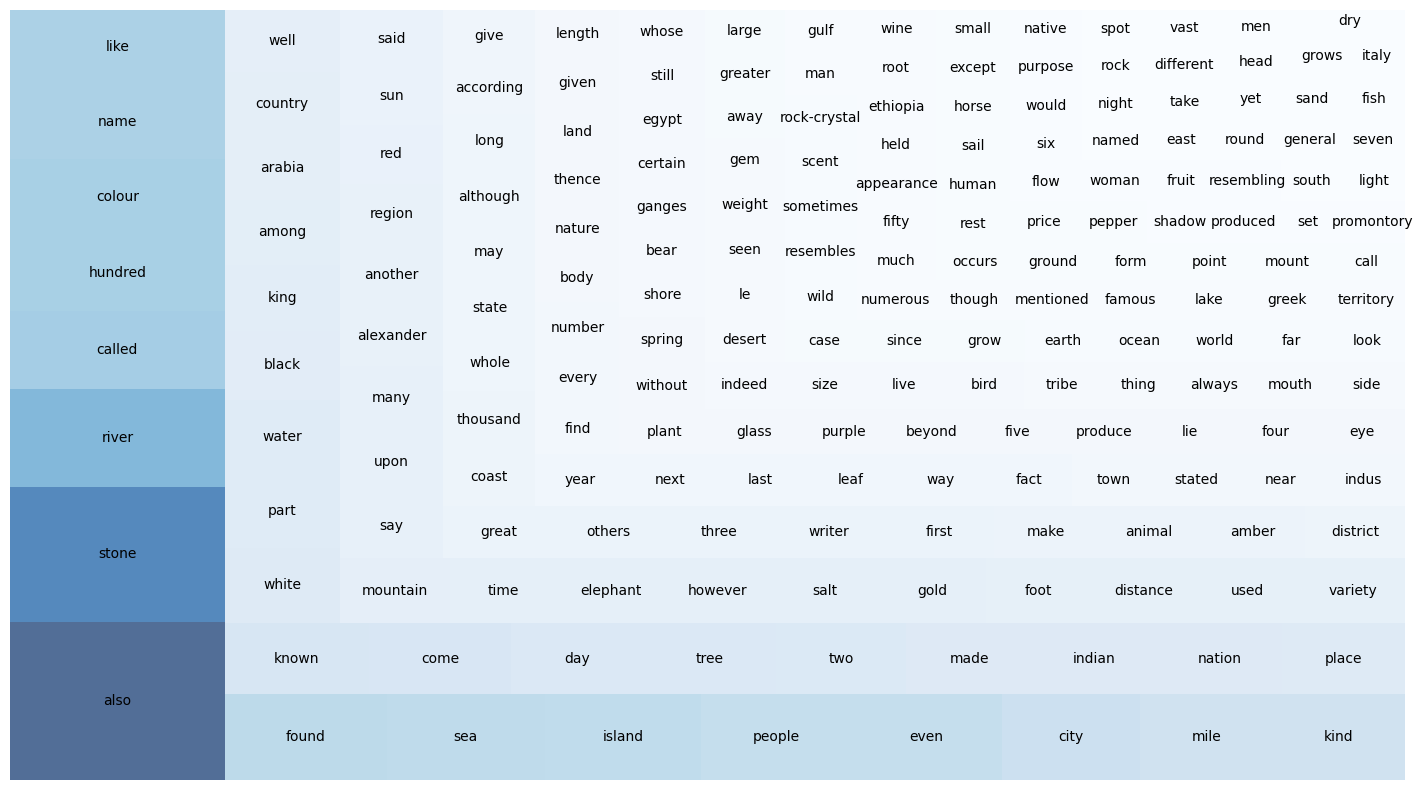

In [85]:
#| label: fig-freqwords_treemap
#| fig-cap: Top 1% frequent words in Indian subcontinent related text as tree map

import squarify
import matplotlib.cm as cm

# top_words contains the list of (word, count) tuples
labels = [word for word, _ in top_words]
sizes = [count for _, count in top_words]

# Normalize the sizes to range between 0 and 1
normalized_sizes = [(size - min(sizes)) / (max(sizes) - min(sizes)) for size in sizes]

# Define the color scale
color_scale = cm.Blues

plt.figure(figsize=(18, 10))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=color_scale(normalized_sizes))

# Add labels and title
plt.axis('off')

# Show the treemap
plt.show()

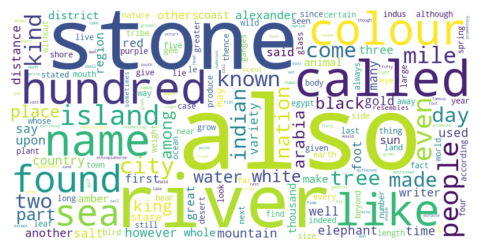

In [80]:
#| label: fig-freqwords_wordcloud
#| fig-cap: Top 1% frequent words in Indian subcontinent related text as word cloud

from wordcloud import WordCloud
# top_words contains the list of (word, count) tuples
wordcloud_data = {word: count for word, count in top_words}

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud from the word frequency data
wordcloud.generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show the plot
plt.show()

An intriguing observation from the word frequency sorting is the prominence of the word "also" in the given text. The word "also" appears frequently, which can be attributed to the encyclopedic nature of the work, where it is often used to draw comparisons in introductions about species and natural phenomena.

As shown in the following examples where "also" appears in the India-related text in *Natural History*, it is indeed used when comparing the counterparts in India after introducing a natural phenomenon, plant or human activity. In this regard, the common use of "also" may imply that India holds significance as a contrast in the broader narrative. 

>2.75.1 "**Also** in India at the well-known port of Patala the sun rises......"

>12.10.1 "In India there is **also** a thorn the wood of which resembles ebony......"

>12.15.1 "There is **also** in India a grain resembling that of pepper, but larger and more brittle......"

>12.17.1 "Arabia **also** produces cane-sugar, but that grown in India is more esteemed."

The hypothesis is further confirmed towards the end of the work in book 37, where Pliny concludes his comprehensive discourse on "Nature". In 37.77.1, Pliny bestows the highest praise upon Italy, considering it to have earned "Nature's crown". And in this context, when expressing his preference and overall judgment, Pliny makes one final mention of "India". He indicates that, "if we leave aside the fabulous marvels of India"^[*Natural History* 37.77.1 (<a href="https://topostext.org/work/153" target="_blank">https://topostext.org/work/153</a>)], Spain can be appreciated as a significant and attractive destination, second only to Italy. This unintentional highlight of India suggests that it holds considerable importance as a distant contrast to the Mediterranean area, where the focal point locates in the *Natural History*'s world scope.

And following by "also", the words "stone", "river", "called" and "colour" notably stand out in the word frequeny sorting. These frequent occurrences suggest some potential themes related to India in the content of *Natural History*, which aligns with the distribution of Indian place names as depicted in @fig-subplots_place_name_count_comparison. 

Looking into the text in the three books pertaining the most mentions of Indian place names, book 6 includes specific topics on Nations of India, the Ganges and Indus (two main rivers in India) and routes of voyages to India, and book 12 contains introductions to trees and the economic values of their roots and leaves, as well as plants and their medical and flavouring effects. While book 37 focuses on descriptions of different types of gemstones, where the priciple types are introduced in a sequence/category of colours, alongside critics about the luxury trade they represents. 

The frequent use of the word "river" in India-related text may be related to the mention of voyage and trading routes concerning India in *Natural History*. On the other hand, "stone" and "color" clearly connect to the content in book 37, which deals with gemstones.

These two potential themes observed from the frequent occuring words indicate that the geographical location and routes toward Indian subcontinent, and its role as an origin of many plants, animals and gemstones, pocesses a significance in the content about India in *Natural History*. 

In addition to word frequency observation, collocation analysis is utilized to explore the common word patterns within the India-related text in *Natural History*.

In [7]:
from nltk import bigrams

bi_grams = list(bigrams(indiatokenlist))

india_bigram_count = len(bi_grams)
india_bigram_show = round(india_bigram_count*0.001)

display(Markdown("""
The top 0.1% of the most likely collocating bi-grams are extracted using the likelihood ratio measurement.
This selection process yields {india_bigram_show} out of {india_bigram_count} bi-grams that are most significant and likely 
to co-occur together in the target corpus.""".format(india_bigram_count = india_bigram_count, india_bigram_show = india_bigram_show)))



The top 0.1% of the most likely collocating bi-grams are extracted using the likelihood ratio measurement.
This selection process yields 18 out of 17728 bi-grams that are most significant and likely 
to co-occur together in the target corpus.

However, during the initial observation, it was noted that approximately one-third of the extracted bi-grams contained the word "hundred", such as in ('hundred', 'fifty') and ('six', 'hundred'). These bi-grams typically denoted measurements for distance, object length, or quantity, offering limited descriptive information about the content of the text. Consequently, the word "hundred" was excluded from further bi-gram extraction to focus on more informative and relevant co-occuring words.

And the updated output bi-grams are list as follows:

In [76]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

keywords = ['hundred']

finder = BigramCollocationFinder.from_words(indiatokenlist)

for keyword in keywords:
    finder.apply_word_filter(lambda w: w == keyword.lower())

measures = BigramAssocMeasures()

finder.nbest(measures.likelihood_ratio, 18)

[('alexander', 'great'),
 ('father', 'liber'),
 ('caspian', 'gate'),
 ('fifty', 'mile'),
 ('denarii', 'pound'),
 ('gold', 'silver'),
 ('precious', 'stone'),
 ('river', 'indus'),
 ('fourteen', 'equinoctial'),
 ('olive', 'oil'),
 ('asia', 'minor'),
 ('equinoctial', 'hour'),
 ('red', 'sea'),
 ('lapis', 'lazuli'),
 ('mile', 'breadth'),
 ('emperor', 'nero'),
 ('already', 'mentioned'),
 ('ft.', 'long')]

The extracted bi-grams can be broadly categorized into four types:

**Historical figures**:
('alexander', 'great'), ('father', 'liber'), ('emperor', 'nero')

**Geographical locations and features**:
('caspian', 'gate'), ('river', 'indus'), ('asia', 'minor'), ('red', 'sea')

**Meseuarments (distance, currency, length, time)**:
('fifty', 'mile'), ('denarii', 'pound'), ('fourteen', 'equinoctial'), ('equinoctial', 'hour'), ('mile', 'breadth'), ('ft.', 'long')

**Trading goods**:
('gold', 'silver'), ('precious', 'stone'), ('olive', 'oil'), ('lapis', 'lazuli')

On the one hand, the presence of bi-grams associated with geographical locations, distance, and time measurements in the India-related text reaffirms India's position as a geographic reference, consistent with the earlier findings from the word frequency list and literature review. On the other hand, within the context of the Indo-Mediterranean network of exchange, the occurrence of bi-grams related to geographical locations, currency measurements, and trading goods underscores the importance of India's role in merchandise trade within the narratives of *Natural History*.

Furthermore, the occurrence of historical figures such as "Alexander III, the Great (king of Macedon)", "Nero (Roman emperor)", and "Father Liber (referring to Dionysus, the Greek god of winemaking and wine)" suggests their connections with India in the history of expeditions or mythical tales (Dionysus is believed to have conquered India in Greek epic). This observation opens up a perspective for clustering the human names mentioned in the text to reveal the content structure about India in *Natural History*, which will be further explored in the Network Analysis section.

In conclusion, the analysis of word frequency and collocation in the India-related text within *Natural History* reveals noteworthy word patterns. These patterns suggest that India holds a significant role as a geographical contrast, being compared in terms of distance, natural phenomena, and origin of products with other regions introduced in the narrative. Furthermore, it is highlighted for its prominent role in merchandise trade in the portrait of India in *Natural History*.

### Topic modeling

Furthermore, topic modeling approach is applied to delve further into the underlying topics about India in the work. Topic modeling is a widely used method for text analysis that infers the latent topics in a collection of documents[@bail; @underwood2012]. Latent Dirichlet Allocation (LDA), as its most commonly employed algorithm, operates under an assumption that each document contains a mixture of different topics, and each topic is defined as a collection of words with varying probabilities of appearance in the passages[@underwood2012;@kapadia2022].

In this study, the collection of India-related text in *Natural History*, segmented into paragraphs, are considered as different "documents". And the [Genism](https://radimrehurek.com/gensim/) library in Python is utilized for semantic vectorization and the implementation of the LDA model on the groups of words within the text^[The code for LDA implementation was referred to the tutorial of @barber].

Since the corpus size for text pertaining to Indian place names is relatively small, after several attempts with a consideration of the coherence score distribution depicted in @fig-topic_coherence_distribution, the number of topics is determined to be 3, with 40 passes to obtain the most optimal and non-overlapping topic clusters.

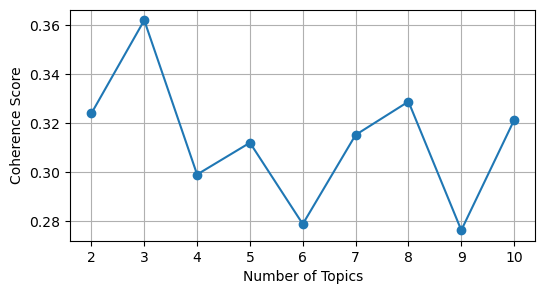

In [75]:
#| label: fig-topic_coherence_distribution
#| fig-cap: Conherence distribution of different topic numbers when passes=40

topic_range = range(2, 11)

# Initialize lists to store coherence scores
coherence_scores = []

# Tokenize and create the corpus and dictionary
indiapara = tokenize_paragraphs(geotext_india['Text'].drop_duplicates())
#indiapara = [[word for word in paragraph if word != 'india'] for paragraph in indiapara]
indiadictionary = corpora.Dictionary(indiapara)
indiacorpus = [indiadictionary.doc2bow(text) for text in indiapara]

# Calculate coherence scores for different topic numbers
for num_topics in topic_range:
    indialdamodel = gensim.models.ldamodel.LdaModel(
        indiacorpus, num_topics=num_topics, id2word=indiadictionary, passes=40
    )
    coherence_model = CoherenceModel(
        model=indialdamodel, texts=indiapara, dictionary=indiadictionary, coherence='c_v'
    )
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence scores against the number of topics
plt.figure(figsize=(6, 3))
plt.plot(topic_range, coherence_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.xticks(topic_range)
plt.grid(True)
plt.show()

And the list of 30 keywords, grouped by the 3 assigned topics, is presented below.

In [27]:
## topic modeling about texts related to "India"

## import the necessary modules

indialdamodel = gensim.models.ldamodel.LdaModel(indiacorpus, num_topics=3, id2word = indiadictionary, passes=40)

from pprint import pprint
pprint(indialdamodel.print_topics(num_topics=3, num_words=30))

[(0,
  '0.014*"stone" + 0.011*"also" + 0.007*"colour" + 0.007*"india" + '
  '0.007*"found" + 0.006*"like" + 0.004*"one" + 0.004*"black" + 0.004*"tree" + '
  '0.004*"amber" + 0.004*"name" + 0.003*"known" + 0.003*"white" + 0.003*"kind" '
  '+ 0.003*"gold" + 0.003*"made" + 0.003*"even" + 0.003*"called" + '
  '0.003*"indian" + 0.003*"glass" + 0.002*"part" + 0.002*"people" + '
  '0.002*"used" + 0.002*"variety" + 0.002*"many" + 0.002*"river" + '
  '0.002*"make" + 0.002*"rock-crystal" + 0.002*"island" + 0.002*"red"'),
 (1,
  '0.009*"stone" + 0.008*"also" + 0.007*"india" + 0.006*"like" + 0.006*"kind" '
  '+ 0.006*"colour" + 0.005*"name" + 0.005*"one" + 0.004*"called" + '
  '0.004*"even" + 0.004*"white" + 0.003*"pepper" + 0.003*"variety" + '
  '0.003*"another" + 0.003*"known" + 0.003*"tree" + 0.003*"black" + '
  '0.003*"weight" + 0.003*"leaf" + 0.003*"purple" + 0.002*"grain" + '
  '0.002*"people" + 0.002*"denarii" + 0.002*"used" + 0.002*"nard" + '
  '0.002*"resembles" + 0.002*"pound" + 0.002*"t

In [17]:
#| output: false

coherence_model = CoherenceModel(model=indialdamodel, texts=indiapara, dictionary=indiadictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Coherence Score:", coherence_score)

Coherence Score: 0.3756133994728454


Based on the prominent categories of the keywords and the possible interconnection within each group, a interpretation of the topic emerged from each keyword clusters can be drawn as follows.

**Group 0**: This group consists of keywords related to precious stones, such as "stone", "amber", "rock-crystal"and "glass", with colour references like "black", "white", and "red". Therefore, the underlying topic appears to be the description of precious stones.

**Group 1**: This group comprises various natural products, such as "tree", "leaf", "pepper","grain" and "nard", along with descriptive words like "weight", "pound" and "taste". In addition, the ancient Roman currency "denarii" appears in the group, suggesting a possible topic related to merchandise trade with Indian subcontinent.

**Group 2**: This group contains different geographical features, such as "river", "island", "sea" and "mountain". It also includes terms related to cities, nations, kings, and distances, and the name "Alexander", referring to Alexander the Great, who has undertook an expedition to Indian subcontinent. "Elephant", as an important property of the King in India during Pliny's era, also represents the power and size of the Indian kingdoms. In this regard, the underlying topic for this group likely pertains to geography and society in India.

The interactive visualisation of the 3 topic clusters, manifesting the intertopic distance map and the most salient/relevant terms within the given textand their contributing weights for each topic, can be accessed on the html version of this [thesis](https://raw.githack.com/lizaodawn/NH_thesis/main/NHthesis_structure.html).

The static demonstration of the visualisation can be referred in @fig-topic_cluster0, @fig-topic_cluster1, @fig-topic_cluster2 and @fig-topic_cluster3.

The intertopic distance map is shown on the left panel of the interactive chart. Each bubble represents a topic, and the size of the bubble indicates the percentage of the texts in the corpus contributing to the topic. The distance between the bubbles implies the extent of difference between them. And a good topic model is expected to have big and non-overlapping bubbles scattered throughout the chart [@tran2022].  

And the most salient/relevant keyword is shown on the right panel. The blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed. The contribution of the frequent word to each topic will be shown in size difference when hovering. And when hovering on the bubbles in the left panel, there will be red bars in the right panel giving the estimated number of times a given term was generated by a given topic. The word with the longest red bar is estimated to be used the most in the texts belonging to that topic. 

In [38]:
import pyLDAvis
import pyLDAvis.gensim_models

# Convert the LdaModel object to a pyLDAvis-compatible format
vis_dataindia = pyLDAvis.gensim_models.prepare(indialdamodel, indiacorpus, indiadictionary, R=30, sort_topics=False)

# Enable the Jupyter notebook inline display of visualizations
pyLDAvis.enable_notebook()

# Display the pyLDAvis visualization
pyLDAvis.display(vis_dataindia)

C:\Users\dawn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\dawn\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


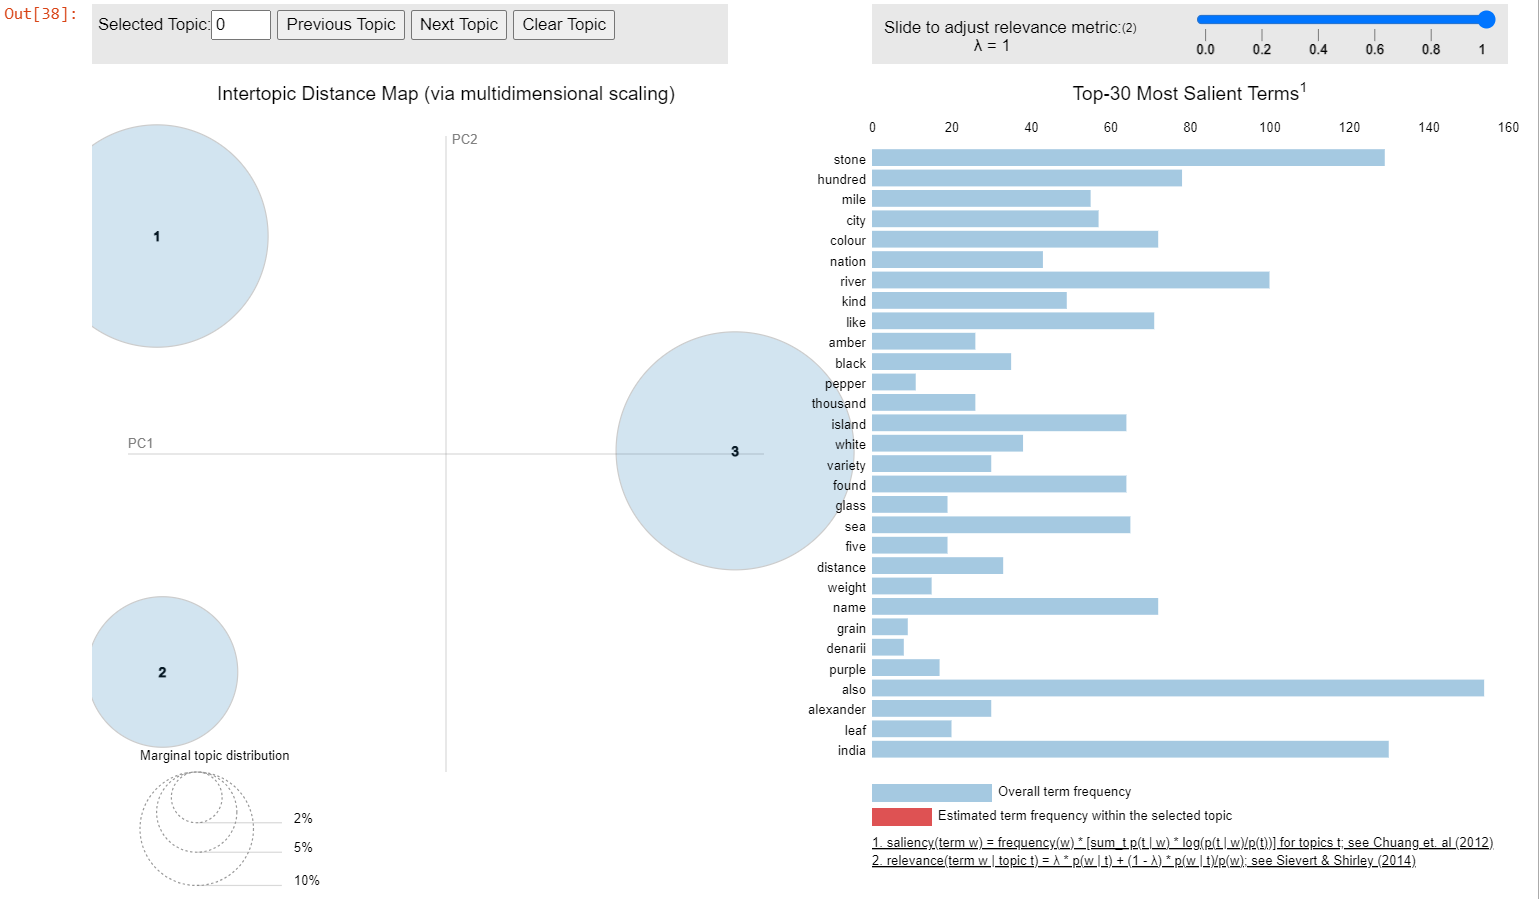

In [39]:
#| label: fig-topic_cluster0
#| fig-cap: Topic cluster (overall) 

Image(filename='topicmodeling00_pdf.png')

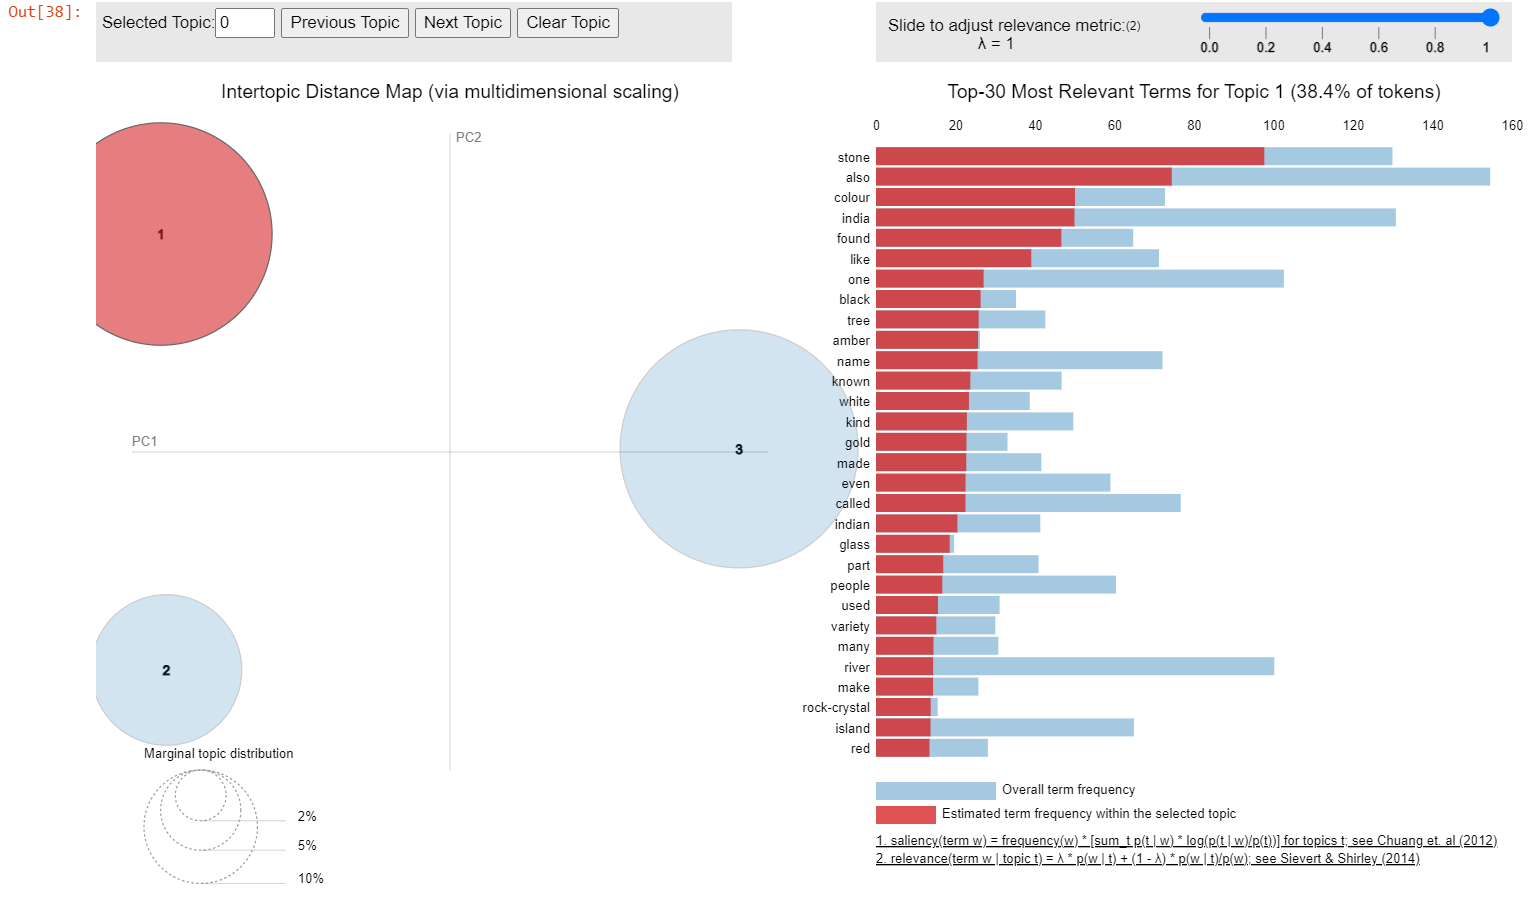

In [40]:
#| label: fig-topic_cluster1
#| fig-cap: Topic cluster (highlighting on Topic_0)

Image(filename='topicmodeling01_pdf.png')

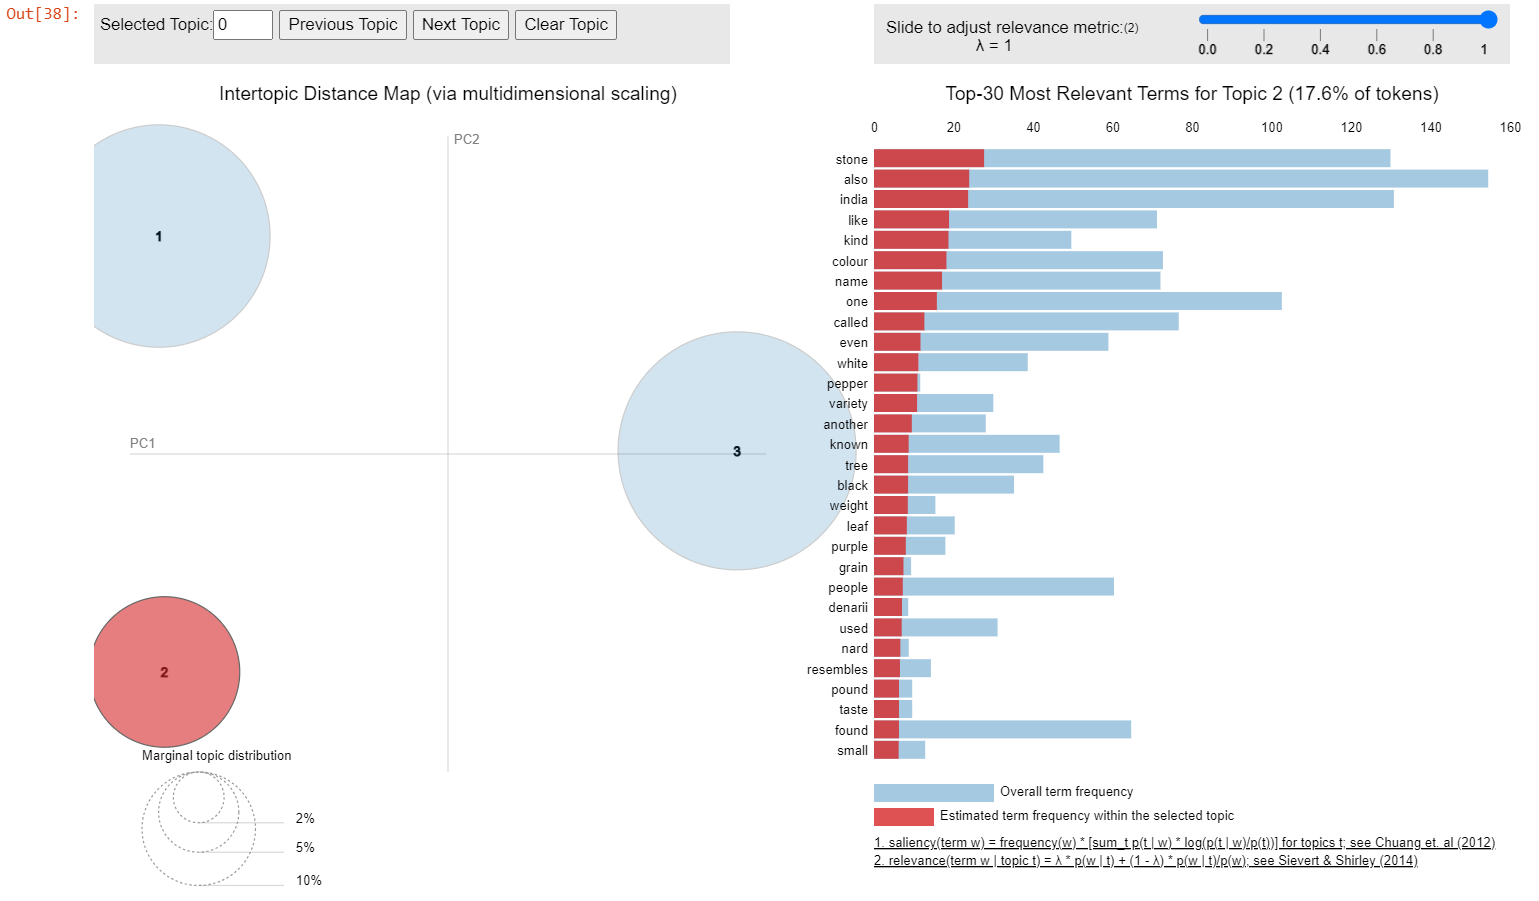

In [41]:
#| label: fig-topic_cluster2
#| fig-cap: Topic cluster (highlighting on Topic_1)

Image(filename='topicmodeling02_pdf.png')

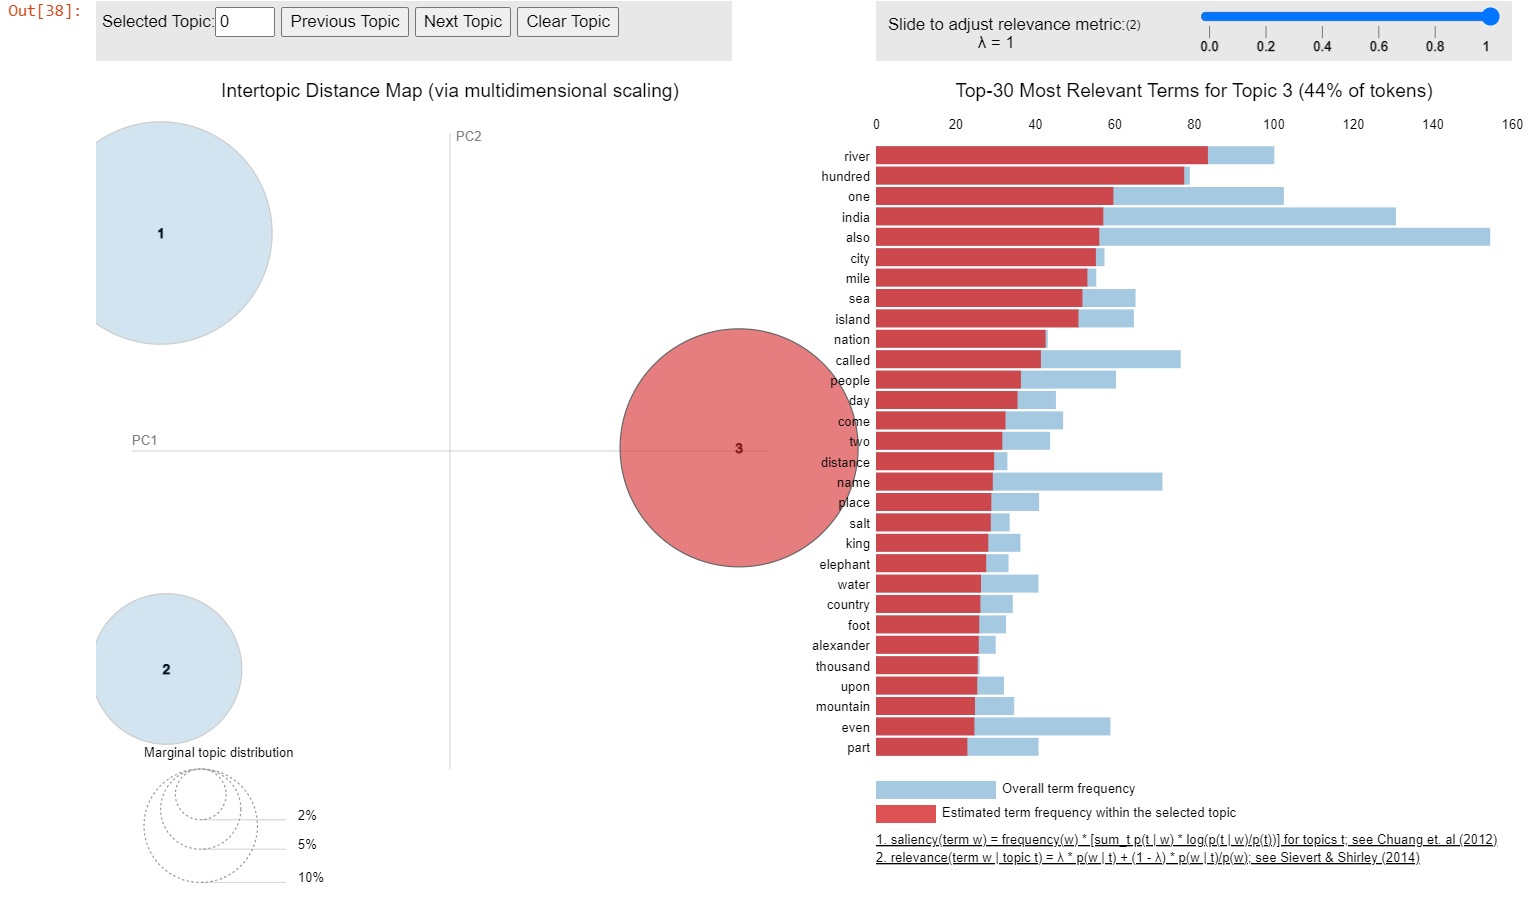

In [42]:
#| label: fig-topic_cluster3
#| fig-cap: Topic cluster (highlighting on Topic_2)

Image(filename='topicmodeling03_pdf.png')

In the above visualisation, the three keyword clusters are distanced from each other, indicating that they formed distinct potential topics within the given text. And the first (about stones) and the last (about Indian geography and society) topics took up a more significatnt portion comparing to the second topic (about merchandise trade).

Additionally, the specific context of the Indian places mentioned in *Natural History* is manually summarized and categorized into broader types to serve as a comparison and extension to the topics generated by the model. The innitial comments about the context were drawn upon a close reading of the related text, with consideration of the book and chapter theme indicated in the text. The comments and summary are stored in CSV format and imported as pandas data frame. 

In [86]:
#| output: false

india_close_context = pd.read_csv('india_corpus_close_reading.csv')
india_close_context['Context summary'] = india_close_context['Context summary'].str.split('; ')
india_close_context = india_close_context.explode('Context summary')

mapping = {
    'goods/animals/plants origin': 'goods/animals/plants origin',
    'geographical reference': 'geographical reference',
    'focused introduction': 'general introduction',
    'origin of high quality goods': 'prominent features',
    'origin of the large sized objects': 'prominent features',
    'passing mention': 'passing mention',
    'human activities relating to plants/animals': 'producing activity',
    'criticism of luxury goods trade': 'criticism',
    'conquest history': 'conquest history',
    'transportation': 'general introduction',
    'marvels in India': 'prominent features',
    'criticism of human greed': 'criticism',
    'criticism of interference with nature': 'criticism',
    'product/knowledge exchange': 'product/knowledge exchange',
    'goods producing activity': 'producing activity'
}

india_close_context['Context type'] = india_close_context['Context summary'].map(mapping)

india_close_context.iloc[:, :-2].join(india_close_context.iloc[:, -1]).head()

Book  Chapter  Paragraph  \
0     2       75          1   
1     2       98          1   
2     2      112          1   
3     4       17          4   
4     4       26          2   

                                             Comment         Context summary  \
0  astronomy, mentioning how the sun motivation i...  geographical reference   
1    description of mountain, mentioning Indus river  geographical reference   
2  description of scope of the world, mentioning ...  geographical reference   
3  topic on Macedonia, metioning it once conquere...        conquest history   
4  description of habitants, mentioned a river in...  geographical reference   

             Context type  
0  geographical reference  
1  geographical reference  
2  geographical reference  
3        conquest history  
4  geographical reference

In [87]:
context_type = india_close_context['Context type'].unique().tolist()

display(Markdown("""
And the summarized comments were further categorized into seven types, namely {context_type}.
""".format(context_type = context_type)))


And the summarized comments were further categorized into seven types, namely ['geographical reference', 'conquest history', 'passing mention', 'general introduction', 'criticism', 'prominent features', 'goods/animals/plants origin', 'producing activity', 'product/knowledge exchange'].


**Geographical reference**: refers to the occurence of Indian place names as geographical reference in the narrative, for example:

> 2.112.1 "...from the river **Ganges** and its mouth where it flows into the Eastern Ocean, through **India** and Parthyene to the Syrian city of Myriandrus situated on the Issic gulf 5,215..."

**Passing mention**: refers to the condition that the names of Indian place included as a side note, for example:

> 5.11.1 "...Coptos, which from its proximity to the Nile, forms its nearest emporium for the merchandise of **India** and Arabia..."

**Conquest history**: refers to the mentions of Indian place names in the context of recalling the conquest history of Alexader the Great, for example:

> 8.61.2 "...When Alexander the Great was on his way to **India**, the king of Albania had presented him with one dog of unusually large size..."

**General introduction**: refers to the focused introduction about the general situation of places in Indian subcontinent, including transportation in the work, it is normally directly indicated at the begining of the affiliated chapter. For example, the whole chapter 21 of book 6 has a leading topic as "The nations of India", the whole chapter 22 of book 6 has a leading topic as "The Ganges".

**Prominent features**: in *Natural History*, the plants and animals from India are often noted for their large size, and Pliny often highlight the good quality of Indian products in his discussion, these genre of context is categorize as "prominent features" of India. For example:

>8.14.1 "...Megasthenes writes that in **India** snakes grow so large as to be able to swallow stags and bulls whole..."
>37.21.1 "...**India**, likewise, is the sole producer of these stones and combining, as they do, the brilliant qualities of the most valuable gems, they above all others description..."

**Goods/animals/plants origin**: there are also many descriptions about India as the origin of different goods, animals and plants, this genre refers to those without concrete comments on their size or quality, just simply mentioned the object is originated in India, for example:

>8.25.2 "Hyrcania and **India** produce the tiger, au animal of terrific speed..."

**Producing activity**: this genre refer to the cases that introduces about the human activity or specific producing process about natural creatures or trading products, such as:

>8.8.1 "The method of capturing them in **India** is for a mahout riding one of the domesticated elephants..."
>37.20.1 "...The **Indians** have found a way of counterfeiting various precious stones, and beryls in particulars by staining rock-crystal."

**Criticism**: woven in the description about merchandise trade with Indian subcontinent, Pliny had drwan direct criticism about the human greed and unnecessary interference on nature it represents, hence these narratives are specificly grouped together, for example:

>12.14.2 "To think that its only pleasing quality is pungency and that we go all the way to India to get this! Who was the first person who was willing to try it on his viands, or in his greed for an appetite was not content merely to be hungry?"

>22.56.1 "I myself shall not touch upon drugs imported from India and Arabia or from the outer world. Ingredients that grow so far away are unsatisfactory for remedies...Let them be bought if you like to make perfumes, unguents and luxuries, or even in the name of religion, for we worship the gods with frankincense and costmary. But health I shall prove to be independent of such drugs, if only to make luxury all the more ashamed of itself."

>33.2.1 "It came to be deemed the proof of wealth, the true glory of luxury, to possess something that might be absolutely destroyed in a moment. Nor was this enough: we drink out of a crowd of precious stones, and set our cups with emeralds, we take delight in holding India for the purpose of tippling, and gold is now a mere accessory."

**Product/knowledge exchange**: in some circumstances, Pliny also mentioned about the knowledge and product exchange during the trade, such as:

>34.48.3 "India possesses neither copper nor lead, and procures them in exchange for her precious stones and pearls."

>37.23.2 "...Indeed, as is generally known, in India the stone is exposed to view by the mountain streams...Later we persuaded the Indians to share our appreciation of it."

And the distribution of context type concluded from close reading is shown in @fig-book_context_distribution and @fig-context_type_freq.

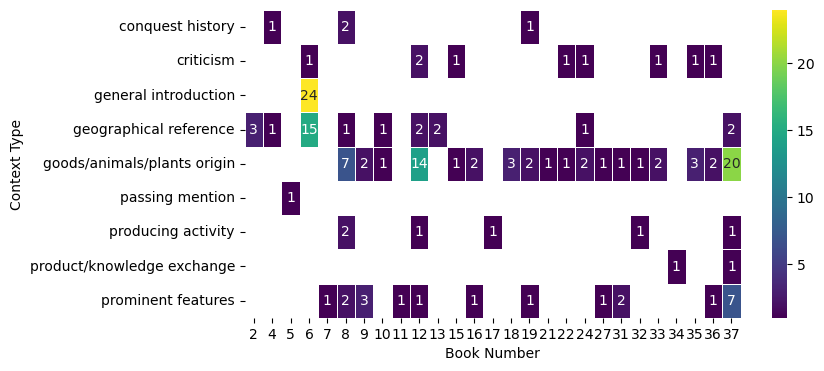

In [89]:
#| label: fig-book_context_distribution
#| fig-cap: Context type distribution in books containing Indian place names

grouped_data = india_close_context.groupby(['Book', 'Context type']).size().reset_index(name='Count')

# Pivot the grouped_data to create the heatmap matrix
heatmap_data = grouped_data.pivot(index='Context type', columns='Book', values='Count')

# Create the heatmap using seaborn
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, linewidths=0.5, cbar=True)

# Set labels and title
plt.xlabel('Book Number')
plt.ylabel('Context Type')

# Show the plot
plt.show()

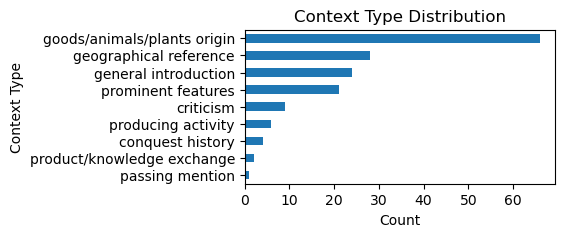

In [88]:
#| label: fig-context_type_freq
#| fig-cap: Occurence frequency of different context type in India-related text 

context_rank = india_close_context['Context type'].value_counts(ascending = True)

plt.figure(figsize=(4, 2))
context_rank.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Context Type')
plt.show()

In general, the contexts concluded from the close reading can relate to the latent topics generated from the distant reading method and added more details to the keywords clusters. That is, if we understand the content about India in *Natural History* in three main topics, namely stons, trade, and contrasting nation, under the "stone" topic, except for describing the colour and texture of different types of gemstone, there also include the description about India as an origin of gemstones in a high quality. And under the large proportion of  Indian places as geographical reference and focused introduction mentioned in the narrative, contributes to the formation of "nation" condition as a major topic. Additionally, there were conquest history of the Roman Empire to Indian subcontinent referred in the description. And for the topic about "trade", though it seem inferior to the previous two in terms of quantity, but it is this part that reflects more sentimental judgement from Pliny out of his stoicism standpoint that worshiping nature as a devine and against luxurious desire [@beagon1996].

On top of the observation from the previous section, that India is seen as an important geographical contrast, as well as a significant trading partner in the narrative, a more nuanced protrait of India, linking the conquest history of the Roman Empire and criticism aobut human greed from the stoicism with abundant natural wonders and products of the best quality in the world can be drawn from the comprehension of topic modelling and close reading. 

### Network analysis for Named Entity

## Conclusions

## Old structure

### Overview of geographical related texts

What topics popped up from the context of place names?

#### Distribution of place names in the entire book

The normalized frequency of place name references in *Natural History* was calculated as the ratio of counts of the occurrences of place names in each book to the word lengths of the book (@tbl-place_book_distribution_old). As depicted in @fig-place_distribution_old, the findings indicate that books 3-6 prominently feature a higher frequency of place name references. This observation is consistent with content structure of *Natural History*, that books 3-6 centered around the themes of **"Geography and ethnography"**, is expected to contain a great number of location references.

In [60]:
#| label: tbl-place_book_distribution_old
#| tbl-cap: Distribution of place names in Natural History
#| df-print: tibble

# Group the items by "Book" and calculate the total word length

book_word_lengths = wholebook.groupby('Book')['Text'].apply(lambda x: x.str.split().str.len().sum()).reset_index()
book_word_lengths.columns = ['Book', 'Total_length']
# Set the "Book" column as the index
book_word_lengths.set_index('Book', inplace=True)

place_counts = geotext_whole['Book'].value_counts().reset_index()
place_counts.columns = ['Book', 'Place_count']
place_counts.set_index('Book', inplace=True)

place_distribution = book_word_lengths.merge(place_counts, on='Book')
place_distribution['Place_freq'] = place_distribution['Place_count']/place_distribution['Total_length']

place_distribution

Total_length  Place_count  Place_freq
Book                                       
1             2778            1    0.000360
2            30570          406    0.013281
3            18037         1007    0.055830
4            15434         1309    0.084813
5            18872         1112    0.058923
6            27890         1012    0.036285
7            21204          225    0.010611
8            24176          185    0.007652
9            19197          140    0.007293
10           20816          121    0.005813
11           27345           77    0.002816
12           13906          188    0.013519
13           13243          164    0.012384
14           15277          189    0.012372
15           14552          135    0.009277
16           25442          180    0.007075
17           29387           82    0.002790
18           35850          222    0.006192
19           18822          146    0.007757
20           22743           21    0.000923
21           17896           95    0.005308
22           16491           24    0.001455
23           15764           17    0.001078
24           17491           56    0.003202
25           16734           85    0.005079
26           15448           35    0.002266
27           12444           40    0.003214
28           26476           28    0.001058
29           13976           31    0.002218
30           14395           23    0.001598
31           12204          222    0.018191
32           14635           76    0.005193
33           17946          113    0.006297
34           18972          193    0.010173
35           21282          277    0.013016
36           21295          357    0.016764
37           22255          282    0.012671

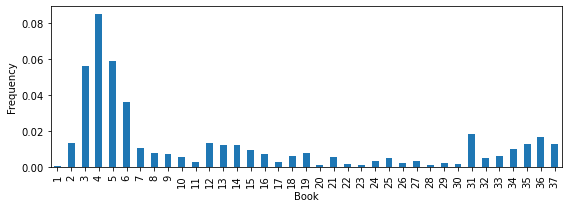

In [105]:
#| label: fig-place_distribution_old
#| fig-cap: Place name distribution in Natural History

fig, ax = plt.subplots(figsize=(10, 3))  # Adjust the figsize to increase the plot size

place_distribution['Place_freq'].plot.bar(ax=ax)
plt.xlabel('Book')
plt.ylabel('Frequency')

# Adjust the plot alignment
plt.tight_layout(rect=[0, 0, 0.8, 1])  # Change the rect values to adjust the alignment

plt.show()

#### Topic modelling on geographical location related text

[Genism](https://radimrehurek.com/gensim/) library is used for semantic vectorization and implemetion of  Latent Dirichlet Allocation (LDA) model for the topic modelling in the captioned text. 

And the library of [pyLDAvis](https://pyldavis.readthedocs.io/en/latest/index.htmlgenism) is applied for an interactive visualization.

In [252]:
from nltk.tokenize import sent_tokenize, word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def tokenize_paragraphs(texts):
    ## apply word tokenization function of NLTK module to each paragraph
    words = [word_tokenize(text, language='English') for text in texts]
    
    
    ## set list of stop words to be excluded from the tokenlist with stopwords function in NLTK
    stop_words = set(stopwords.words('English'))
    
    lemmatizer = WordNetLemmatizer()
    
    ## append words of text into a tokenlist
    tokenlistpara = []
    for paragraph in words:
        paragraph_tokens = []
        for token in paragraph:
            if token.lower() and token.lower() not in stop_words and len(token.lower()) > 2:
                ## lemmatize the tokens
                lemmatized_token = lemmatizer.lemmatize(token.lower())
                paragraph_tokens.append(lemmatized_token)
        tokenlistpara.append(paragraph_tokens)
    return tokenlistpara


para = tokenize_paragraphs(geotext_whole['Text'].drop_duplicates())

## import the necessary modules

from gensim import corpora, models
import gensim

# turn our tokenized documents into a id <-> term dictionary
paradictionary = corpora.Dictionary(para)

# convert tokenized documents into a document-term matrix
paracorpus = [paradictionary.doc2bow(text) for text in para]

# generate LDA model with tokenlist in paragraphs 
paraldamodel = gensim.models.ldamodel.LdaModel(paracorpus, num_topics=5, id2word = paradictionary, passes=20)

## display the assigned 5 topics and 30 words in each topic
from pprint import pprint
pprint(paraldamodel.print_topics(num_topics=5, num_words=30))

[(0,
  '0.010*"also" + 0.004*"picture" + 0.003*"painted" + 0.003*"milk" + '
  '0.003*"sponge" + 0.003*"first" + 0.003*"dung" + 0.003*"bird" + 0.002*"egg" '
  '+ 0.002*"made" + 0.002*"time" + 0.002*"horse" + 0.002*"year" + '
  '0.002*"caesar" + 0.002*"painting" + 0.002*"one" + 0.002*"goat" + '
  '0.002*"said" + 0.002*"two" + 0.002*"called" + 0.002*"give" + 0.002*"boy" + '
  '0.002*"onion" + 0.002*"among" + 0.002*"day" + 0.002*"great" + 0.002*"sheep" '
  '+ 0.002*"make" + 0.002*"famous" + 0.001*"wine"'),
 (1,
  '0.018*"also" + 0.011*"kind" + 0.007*"called" + 0.007*"stone" + 0.007*"like" '
  '+ 0.006*"wine" + 0.006*"colour" + 0.006*"leaf" + 0.006*"one" + '
  '0.005*"plant" + 0.005*"tree" + 0.005*"used" + 0.005*"water" + 0.005*"found" '
  '+ 0.005*"white" + 0.005*"root" + 0.004*"taken" + 0.004*"made" + '
  '0.004*"variety" + 0.004*"oil" + 0.004*"name" + 0.004*"seed" + 0.004*"black" '
  '+ 0.003*"make" + 0.003*"grows" + 0.003*"even" + 0.003*"honey" + '
  '0.003*"juice" + 0.003*"said" + 0.00

The text data undergoes tokenization and lemmatization using functions from the [NLTK](https://www.nltk.org/) package. This preprocessing step aims to obtain meaningful words that facilitate the inference of potential topics based on grouped keywords. To ensure the modeling results consist of words with descriptive meaning, stop words in English are excluded, along with tokens having a length less than 2, when preparing the corpus for input into the LDA module.

After several tryouts, the number of topics is set to 5, and the passes is set to 20, in order to generate distinct and non-overlapping topic clusters.

The following visualization presents the top 30 keywords for each topic, along with their respective weights, which rank their contributions to the topic.

In [253]:
# label: fig-geotexttm
# fig-cap: Topic modelling of place names related text

import pyLDAvis
import pyLDAvis.gensim_models

# Convert the LdaModel object to a pyLDAvis-compatible format
vis_datapara = pyLDAvis.gensim_models.prepare(paraldamodel, paracorpus, paradictionary, R=30, sort_topics=False)

# Enable the Jupyter notebook inline display of visualizations
pyLDAvis.enable_notebook()

# Display the pyLDAvis visualization with adjusted size
pyLDAvis.display(vis_datapara)


C:\Users\dawn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In the left panel of the above interactive chart, each bubble represents a topic, and the size of the bubble indicates the percentage of the texts in the corpus contributing to the topic. The distance between the bubbles implies the extent of difference between them. And a good topic model is expected to have big and non-overlapping bubbles scattered throughout the chart [@tran2022].  

And in the right panel, the blue bars represent the overall frequency of each word in the corpus. If no topic is selected, the blue bars of the most frequently used words will be displayed. When hovering on the bubbles in the left panel, there will be red bars in the right panel giving the estimated number of times a given term was generated by a given topic. The word with the longest red bar is estimated to be used the most in the texts belonging to that topic. 

An intriguing observation about the overall result of the topic modelling is that the word "also" comprises a large protion in the given text, and appears in all assigned topics. Taking the encyclopedia scope of Natural History into consideration, it may imply that the place names are prone to be mentioned in a context of enumerason and comparison. In the literary studies by @pollard2009 and @murphy2003, Pliny gave a critical description of the geographical surroundings and their exotic counterparts (e.g., Po River and Nile River), which may confirms it worthwhile getting a deeper exploration in the usage and reference of the place names in Natual History in order to map the scope and vision he attempted to display in the encyclopedia by Pliny the Elder.

More specifically, a rough generalization can be drown for each topic with the dominant words in it as follows, which may help to conclude the themes and keywords for geography related context in *Natural History*.

Topic 1: **Artistic Elements and Objects** - The presence of paintings, milk, sponges, and other objects adds to the artistic and visual aspects of the context.

Topic 2: **Botanical and Natural Elements** - Various plants, trees, colors, and natural materials contribute to the botanical richness depicted in the book.

Topic 3: **Geographic Features and Places** - Islands, rivers, cities, and other geographical features play a significant role in the narrative, highlighting the diverse landscapes explored in the text.

Topic 4: **Distance and Proximity** - Distances, towns, rivers, and seas provide insights into the spatial relationships and navigational aspects within the book.

Topic 5: **Historical and Cultural References** - Roman history, statues, temples, and notable figures showcase the historical and cultural context prevalent in the book.

In addition, as shown in the visualization chart, the Topic 5: **Historical and Cultural References** and Topic 2: **Botanical and Natural Elements** seem to be the most prominent topics about geographical location related text in *Natural History*.

In conclusion, the general exploratory analysis about geographical location related text in *Natural History* shows that in the books about geography and ethnography, and mining and mineralogy, place names are most frequently referred. And the potential topics about geograpical location related contents are "Artistic Elements and Objects", "Geographic Features and Places", "Distance and Proximity", "Historical and Cultural References" and "Botanical and Natural Elements", with the latter two as the most prominent topics in the context.

Considering the comprehensive scope of *Natural History*, the presence of concrete place names provides a valuable opportunity to delve deeper into Pliny the Elder's perception and imagination of landscapes. Therefore, it is worthwhile to embark on a more detailed examination of the distribution, significance, and contextualization of place names in *Natural History* to gain insights into how Pliny the Elder crafted the narrative and conveyed his understanding of the world.

### Prominent location mentioned in Natural History

What place stands out in the narrative? And how does it align with the scope and underlying concept of *Natural History*?

#### Place name distribution

In [8]:
#| echo: false

place_number = len(geotext_whole['ToposText_ID'].unique().tolist())

display(Markdown("""
By grouping the "ToposText_ID" (as indicator for distinct geographical loactions in the text) in the earlier constructed dataframe, there are {place_number} unique places mentioned in *Natural History*.
""".format(place_number = place_number)))


By grouping the "ToposText_ID" (as indicator for distinct geographical loactions in the text) in the earlier constructed dataframe, there are 2052 unique places mentioned in *Natural History*.


The top 20 most frequent place names mentioned (as 1% of total) in *Natural History* is shown in @tbl-topplace_old.

In [277]:
#| label: tbl-topplace_old
#| tbl-cap: Top 20 mentioned place names in Natural History
#| df-print: tibble

## sort the top 1% places referred in descending order

place = geotext_whole.groupby('ToposText_ID')[['Place_Name','Lat','Long']].value_counts().reset_index(name='Count')
sorted_place = place.sort_values(by='Count', ascending=False)
top_count = sorted_place.iloc[19]['Count']
topplace = sorted_place[sorted_place['Count'] >= top_count]
topplace

ToposText_ID Place_Name      Lat      Long  \
1687  https://topostext.org/place/406163RIta      Italy     40.6      16.3   
2034  https://topostext.org/place/419125PRom       Rome   41.891    12.486   
52    https://topostext.org/place/271307REgy      Egypt     27.1      30.7   
82    https://topostext.org/place/300740RInd      India       30        74   
57    https://topostext.org/place/280400RAra     Arabia       28        40   
320   https://topostext.org/place/355390RSyr      Syria     35.5        39   
255   https://topostext.org/place/350330RCyp     Cyprus       35        33   
109   https://topostext.org/place/312301WNil       Nile  30.0918   31.2313   
2282  https://topostext.org/place/441073LAlp       Alps   44.142     7.343   
766   https://topostext.org/place/376145RSic     Sicily     37.6      14.5   
275   https://topostext.org/place/352252IKre      Crete  35.2052   25.1836   
7     https://topostext.org/place/130350REth   Ethiopia    13.01     35.01   
417   https://topostext.org/place/364282IRho     Rhodes  36.4408   28.2244   
966   https://topostext.org/place/380237PAth     Athens  37.9718  23.72793   
2043  https://topostext.org/place/419125SCap    Capitol  41.8933    12.483   
298   https://topostext.org/place/353403WEup  Euphrates  35.2791   40.2708   
2241  https://topostext.org/place/435335WPon     Pontus     43.5      33.5   
1839  https://topostext.org/place/411146RCam   Campania     41.1      14.6   
1480  https://topostext.org/place/397443RArm    Armenia   39.702    44.298   
17    https://topostext.org/place/195390WEry    Red Sea     19.5        39   
545   https://topostext.org/place/369103PCar   Carthage    36.85     10.32   
602   https://topostext.org/place/370340RCil    Cilicia    37.01     34.01   

      Count  
1687    292  
2034    269  
52      261  
82      167  
57      123  
320     109  
255      85  
109      85  
2282     82  
766      71  
275      64  
7        58  
417      56  
966      56  
2043     52  
298      47  
2241     47  
1839     46  
1480     45  
17       42  
545      42  
602      42

The place names referenced in Natural History are geographically mapped, with each location marked on the map using its corresponding coordinates. A dot is assigned to represent each place, with the size and color of the dot reflecting the frequency of its mention in the book. The larger and darker the dot, the more frequently the place is referenced within the context of *Natural History*.  

An intriguing observation from the output, as depicted in @fig-geonamemap_old, is the prominence of India—a region outside the Mediterranean—despite its high frequency of mentions.

In [425]:
#| label: fig-geonamemap_old
#| fig-cap: Place name distribution map

import folium
from branca.colormap import LinearColormap

# Create a Folium map centered on a specific location
map = folium.Map(location=[32, 53], zoom_start=3)

# Define the minimum and maximum count values for the color scale
min_count = place['Count'].min()
max_count = place['Count'].max()

# Create a color map based on the count values
color_map = LinearColormap(colors=['#FFCC00', '#FF6600'],
                           vmin=min_count,
                           vmax=max_count)

# Iterate over each row in the dataframe
for index, row in place.iterrows():
    place_name = row['Place_Name']
    count = row['Count']
    latitude = row['Lat']
    longitude = row['Long']
    
    # Get the color based on the count using the color map
    color = color_map(count)
    
    # Create a circle marker with a size based on the count and color based on the count
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=count/10,  # Adjust the size of the marker based on the count
        weight=0,
        fill=True,
        fill_color=color,
        fill_opacity=1,
        tooltip=f'{place_name}: {count} counts'
    ).add_to(map)

# Add the color scale to the map
color_map.caption = 'Count'
color_map.add_to(map)

# Display the map
map

#### Zooming into "India"

As highlighted in the research conducted by @nappo2017, the era of Pliny the Elder's writing of *Natural History* witnessed a thriving Indo-Roman trade relationship. The prominence of the term "India" within the text suggests that this trade connection holds considerable significance in the narrative of *Natural History*.

To provide more comprehensive contextual analysis, the focus is extended beyond solely "India" to the regions that encompass the empires of the Indian subcontinent. The approximate range of coordinates defining the target region is as follows:^[Given the challenges in determining the precise coordinates of the Empires in the Indian region during the 1st century AD, an approximate range of coordinates for the current Indian subcontinent is used as a rough estimation.]

Latitude:
Northernmost point: Approximately 37.6 degrees North (located in the region of Jammu and Kashmir in India)
Southernmost point: Approximately 5.5 degrees North (located in the region of Dondra Head in Sri Lanka)

Longitude:
Westernmost point: Approximately 60.9 degrees East (located in the region of Gwadar in Pakistan)
Easternmost point: Approximately 97.4 degrees East (located in the region of Kibithu in India)

And a dataframe for Indian subcontinent related texts can be filetered with the captioned coordinates range. 

In [58]:
#| df-print: tibble

# convert the 'Lat' and 'Long' information in the original dataframe to numeric format
geotext_whole['Lat'] = geotext_whole['Lat'].astype(float)
geotext_whole['Long'] = geotext_whole['Long'].astype(float)

# define the filter range of latitude and longitude ranges for Indian subcontinent
lat_range = (5.5, 37.6)
long_range = (60.9, 97.4)

# create a boolean mask for filtering
mask = (geotext_whole['Lat'].between(*lat_range)) & (geotext_whole['Long'].between(*long_range))

# apply the mask to filter the dataframe
geotext_india = geotext_whole[mask]
geotext_india.to_csv('geotext_indianregion.csv')

geotext_india.head()

UUID4  \
85   1c5714c4-00f4-4ed3-81db-691ae52ac72d   
92   a3f8e7ea-fd33-40b5-8095-a1feb0c19919   
93   70343d33-a104-4566-ab63-b3e70527a21c   
218  da1d2386-a176-4995-9a2a-37cdf7e07ec8   
326  305c95c4-ae38-4751-a686-3b72a6bed815   

                               ToposText_ID Place_Name  \
85   https://topostext.org/place/300740RInd      India   
92   https://topostext.org/place/300740RInd      India   
93   https://topostext.org/place/300740RInd      India   
218  https://topostext.org/place/254683WInd      Indus   
326  https://topostext.org/place/340670RBac    Bactria   

                                   Reference      Lat     Long  Book  Chapter  \
85    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
92    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
93    urn:cts:latinLit:phi0978.phi001:2.75.1  30.0000  74.0000     2       75   
218   urn:cts:latinLit:phi0978.phi001:2.98.1  25.4487  68.3192     2       98   
326  urn:cts:latinLit:phi0978.phi001:2.110.1  36.7680  66.9010     2      110   

     Paragraph                                               Text  
85         1.0  Similarly it is reported that at the town of S...  
92         1.0  Similarly it is reported that at the town of S...  
93         1.0  Similarly it is reported that at the town of S...  
218        1.0  Near the town of Harpasa in Asia stands a jagg...  
326        1.0  But among mountain marvels — Etna always glows...

In [11]:
#| echo: false

indiatext_shape = geotext_india.shape

display(Markdown("""
The shape of the filtered dateframe for texts and place coordinates related to Indian subcontinent is {indiatext_shape}. 
And the dataframe is also saved as .csv for further reference.
""".format(indiatext_shape = indiatext_shape)))


The shape of the filtered dateframe for texts and place coordinates related to Indian subcontinent is (241, 10). 
And the dataframe is also saved as .csv for further reference.


In [41]:
#| echo: false

distinct_places = geotext_india['Place_Name'].unique()

# check the distinct place names in the selected region
display(Markdown("""
And the places refered in the captioned region in the dataframe are: {distinct_places}.""".format(distinct_places = distinct_places)))


And the places refered in the captioned region in the dataframe are: ['India' 'Indus' 'Ganges' 'Acesinus' 'Hydaspes' 'Taprobane' 'Arachosia'
 'Muziris' 'Baragaza' 'Ceylon'].

In [26]:
geotext_india_unique = geotext_india['Text'].drop_duplicates()
geotext_india_unique.to_csv('geotext_indianregion_unique.csv')

The comparison between the total number of place names and the place names specifically related to the Indian subcontinent mentioned in each book, is depicted in @fig-grouped_place_name_count_comparison_old. The difference in numbers between the two categories is significant, as indicated by the large disparity.

To facilitate a more effective comparison of the referencing trends across different books, @fig-subplots_place_name_count_comparison_old presents subplots with varying y-axis scales. This approach allows for a clearer visualization of the trends and patterns in place name references throughout the various books.

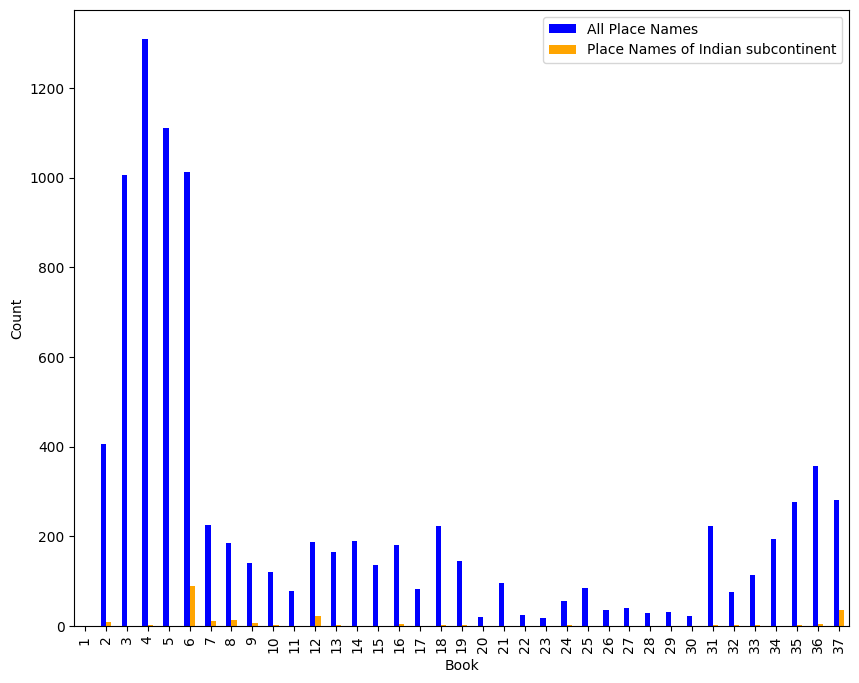

In [17]:
#| label: fig-grouped_place_name_count_comparison_old
#| fig-cap: Occurence count for all place names and place names of Indian subcontinent in each book

import matplotlib.pyplot as plt

# Compute the grouped count of place names in the current DataFrame
allplacecount = geotext_whole.groupby('Book')['Chapter'].count()

# Compute the grouped count of place names in the other DataFrame
indianplacecount = geotext_india.groupby('Book')['Place_Name'].count()

# Combine the counts into a single DataFrame
combined_counts = pd.concat([allplacecount, indianplacecount], axis=1)
combined_counts.columns = ['All Place Names', 'Place Names of Indian subcontinent']
combined_counts.fillna(0, inplace=True)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the combined counts as a bar chart with different colors
combined_counts.plot.bar(color=['blue', 'orange'], ax=ax)


# Customize the plot
ax.set_xlabel('Book')
ax.set_ylabel('Count')

# Show the plot
plt.show()


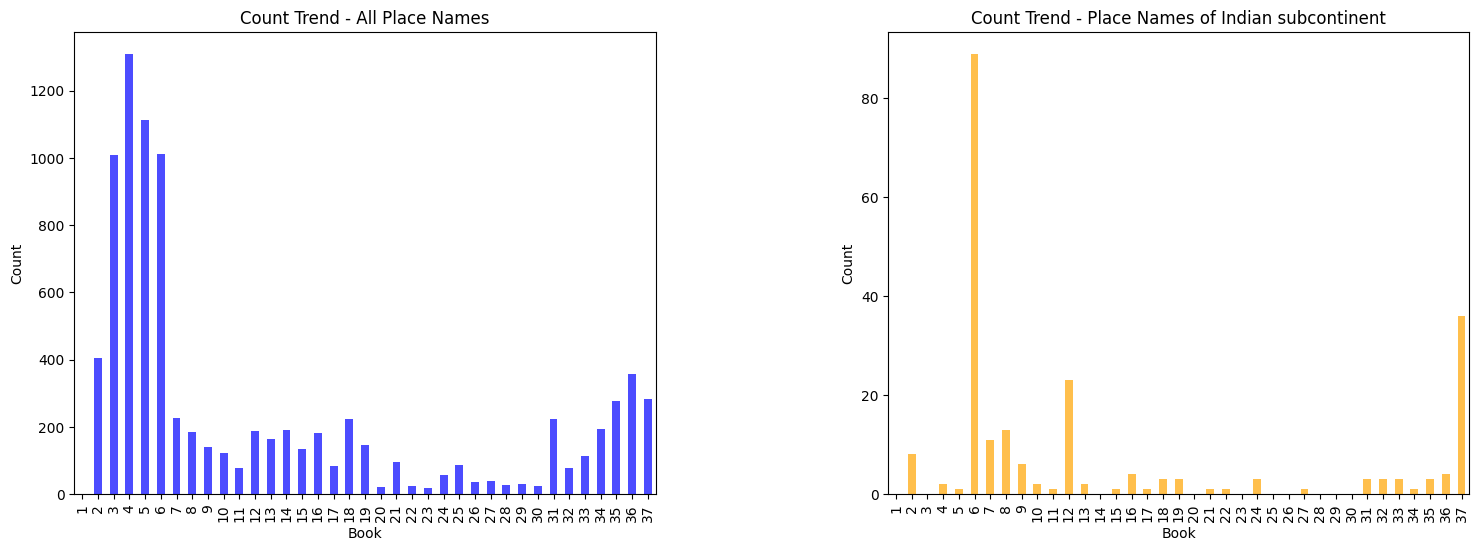

In [22]:
#| label: fig-subplots_place_name_count_comparison_old
#| fig-cap: Occurence count for all place names and place names of Indian subcontinent in each book_different y-axis scales 

# Set up the figure and axes for the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot the bar chart for 'All Place Names' on the first subplot
combined_counts['All Place Names'].plot(kind='bar', ax=ax1, color='blue', alpha=0.7)
ax1.set_xlabel('Book')
ax1.set_ylabel('Count')
ax1.set_title('Count Trend - All Place Names')

# Plot the bar chart for 'Other Place Names' on the second subplot
combined_counts['Place Names of Indian subcontinent'].plot(kind='bar', ax=ax2, color='orange', alpha=0.7)
ax2.set_xlabel('Book')
ax2.set_ylabel('Count')
ax2.set_title('Count Trend - Place Names of Indian subcontinent')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()

The figures reveal a distinct difference between the occurrence trends of place names related to the Indian subcontinent and all place names collectively. Specifically, the referencing of the Indian subcontinent is highly concentrated in books 6, 12, and 37 of Pliny's narrative. This discrepancy indicates that the mentioning of place names from the Indian subcontinent is closely tied to specific themes and topics within Pliny's work.

In this regard, three methodologies have been employed to analyze the texts pertaining to the Indian subcontinent in *Natural History*, including collocation analysis, topic modeling, and network analysis. The objective of these analyses is to delve deeper into the textual content, unraveling the intricate relationships and uncovering the underlying themes and connections associated with the place names of the Indian subcontinent.

Through collocation analysis, the aim is to identify significant word combinations and phrases that co-occur with the place names of the Indian subcontinent. This analysis provides insights into the specific linguistic patterns and contextual associations surrounding these locations, shedding light on their cultural, historical, and geographical significance.

Topic modeling allows for a broader exploration of the thematic landscape within which the Indian subcontinent place names are embedded. By clustering related words and identifying prevalent topics, this methodology helps to discern the major themes and subject matters that emerge from Pliny's narrative, providing a comprehensive understanding of the broader context in which these place names are referenced.

Furthermore, network analysis offers a visual representation of the interconnections among the place names of the Indian subcontinent and other entities in Pliny's work. By examining the relationships between different locations and named entities, this analysis uncovers the geographical and conceptual networks that exist within the text, revealing how the Indian subcontinent place names contribute to the overall structure and narrative flow of *Natural History*.

Together, these methodologies aim to provide a nuanced and comprehensive exploration of the texts related to the Indian subcontinent in *Natural History*. By delving into the linguistic, thematic, and network aspects of these place names, a deeper understanding of their significance and their role in shaping Pliny's narrative can be achieved.

##### Frequency list and collocations in Indian subcontinent related texts

Through the utilization of measures available in the [NLTK](https://www.nltk.org/) package, a word frequency list and a list of collocating bi-grams of the texts pertaining to the Indian subcontinent are generated to investigate potential keywords and themes of interest.

To enhance the relevance and descriptive nature of the frequency list, particular attention has been given to exclude two commonly encountered but less informative words, namely "india" and "also", from the token list. 

In [432]:
indiatokenlist = [word for paragraph in tokenize_paragraphs(geotext_india['Text'].drop_duplicates()) for word in paragraph]
indiatokenlist = [token for token in indiatokenlist if token != 'india' and token != 'also']

# apply the freqency distribution function to the token list
freq_dist = nltk.FreqDist(indiatokenlist)

# Sort the words by frequency in descending order
sorted_words = freq_dist.most_common()

# Get the frequency of the 20th word
top_count = sorted_words[188][1]

# Get all words with frequencies greater than or equal to the frequency of the 20th word
top_words = [(word, count) for word, count in sorted_words if count >= top_count]

corpus_size = len(indiatokenlist)
top_freq = len(top_words)
top_freq_ratio = round(top_freq/corpus_size*100)
top_freq_ratio

display(Markdown("""Among {corpus_size} tokens of the whole corpus for Indian subcontinent related text, 
{top_freq} (the top {top_freq_ratio}%) frequent words is filterd out and shown in @fig-freqwords_treemap and @fig-freqwords_wordcloud.""".format(corpus_size = corpus_size, top_freq = top_freq, top_freq_ratio = top_freq_ratio)))

Among 18775 tokens of the whole corpus for Indian subcontinent related text, 
197 (the top 1%) frequent words is filterd out and shown in @fig-freqwords_treemap and @fig-freqwords_wordcloud.

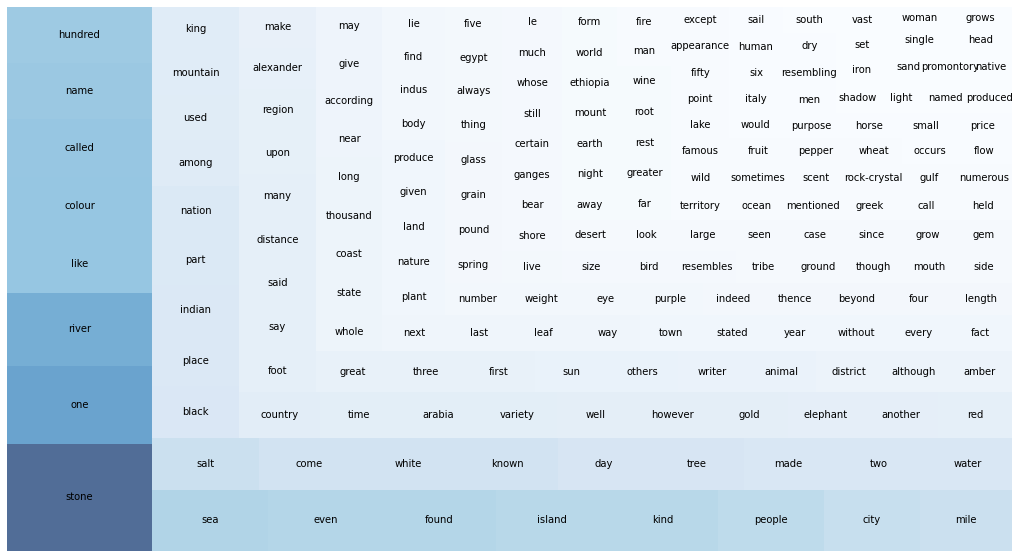

In [394]:
#| label: fig-freqwords_treemap_old
#| fig-cap: Top 1% frequent words in Indian subcontinent related text as tree map

import squarify
import matplotlib.cm as cm

# top_words contains the list of (word, count) tuples
labels = [word for word, _ in top_words]
sizes = [count for _, count in top_words]

# Normalize the sizes to range between 0 and 1
normalized_sizes = [(size - min(sizes)) / (max(sizes) - min(sizes)) for size in sizes]

# Define the color scale
color_scale = cm.Blues

plt.figure(figsize=(18, 10))
squarify.plot(sizes=sizes, label=labels, alpha=0.7, color=color_scale(normalized_sizes))

# Add labels and title
plt.axis('off')

# Show the treemap
plt.show()

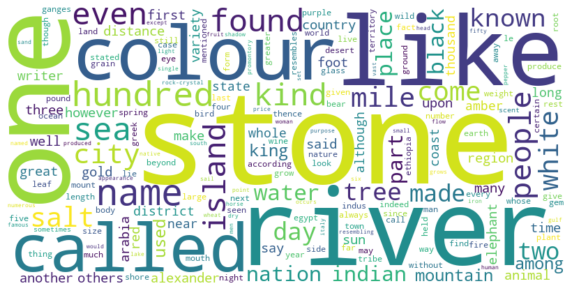

In [393]:
#| label: fig-freqwords_wordcloud_old
#| fig-cap: Top 1% frequent words in Indian subcontinent related text as word cloud

from wordcloud import WordCloud
# top_words contains the list of (word, count) tuples
wordcloud_data = {word: count for word, count in top_words}

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud from the word frequency data
wordcloud.generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show the plot
plt.show()

As depicted in the visualizations, the words "stone," "river," and "color" notably stand out, suggesting their prominence in the narrative pertaining to the regions of the Indian subcontinent. This observation is indicative of the significant references to precious stones and the origins and transportation routes associated with the trade of such valuable commodities.

The collocating bi-grams associated with place names of the Indian subcontinent region are extracted based on the top 20 highest scores in the likelihood ration measurement. A higher likelihood ratio score indicates a stronger association or collocation between the words, suggesting that they are more likely to appear together in the given text. 

The extracted collocations undergo a filtering process that specifically includes those involving keywords of place names within the regions of the Indian subcontinent, whihc enables a focused analysis of collocations directly relevant to the geographic context.

In [399]:
keywords = ['India', 'Indus', 'Bactria', 'Ganges', 'Acesinus', 'Oxus', 'Hydaspes', 'Taprobane', 'Arachosia', 'Muziris', 'Baragaza', 'Aria', 'Ceylon']

finder = BigramCollocationFinder.from_documents(para)

for keyword in keywords:
    finder.apply_word_filter(lambda w: w == keyword.lower())

measures = BigramAssocMeasures()

finder.nbest(measures.likelihood_ratio, 20)

[('already', 'mentioned'),
 ('present', 'day'),
 ('alexander', 'great'),
 ('father', 'liber'),
 ('taken', 'drink'),
 ('formerly', 'called'),
 ('majesty', 'augustus'),
 ('fifty', 'mile'),
 ('late', 'majesty'),
 ('next', 'come'),
 ('roman', 'citizen'),
 ('mile', 'circumference'),
 ('human', 'being'),
 ('greek', 'name'),
 ('late', 'lamented'),
 ('marcus', 'varro'),
 ('one', 'hundred'),
 ('hundred', 'fifty'),
 ('rising', 'dog-star'),
 ('emperor', 'nero')]

Interestingly, in the flitered bi-grams, 20% of them are referring to human names or names of gods in myths (e.g. Alexander III, the Great (king of Macedon); Octavius Caesar Augustus (Roman Emperor); Nero (Roman emperor); Marcus Varro (ancient Latin scholar), Father Liber (referring to Dionysus, Greek god of winemaking and wine)).

As shown in the quotation of Book 16, Chapter 62, Paragraph 1, the word "India" was mentioned in the context of an introduction of a plant, as a counterpart in the plant origin, and as a conquered land intertwining with the historical story about how the plant was brought to Rome by Alexander the Great.  

>16.62.1  It is said that ivy now grows in Asia Minor. Theophrastus about 314 BC. had stated that it did not grow there, nor yet in **India** except on Mount Meros, and indeed that Harpalus had used every effort to grow it in Media without success, while **Alexander** had come back victorious from **India** with his army wearing wreaths of ivy, because of its rarity, in imitation of **Father Liber**; and it is even now used at solemn festivals among the peoples of Thrace to decorate the wands of that god, and also the worshippers' helmets and shields, although it is injurious to all trees and plants and destructive to tombs and walls, and very agreeable to chilly snakes, so that it is surprising that any honour has been paid to it.

\##(More detailed analysis and illustration will be further conducted for the pattern of interactions between Indian subcontinent place names and human names in the book. )

#### Topic modelling about Indian subcontinent region related texts

Since the corpus size for text pertaining Indian subcontient region is rather small, with certain tryouts, the the number of topics is set as 3 and the passes is set as 40 to get the most noon-overlapping topic clusters. 

The word "India" is excluded from the corpus in order to get more descriptive keywords which may contribe to a more concrete topic summary. 

The top 30 keywords for each topic, along with their respective weights, which rank their contributions to the topic is shown and visualized as follows.

In [404]:
## topic modelling about texts related to "India"

indiapara = tokenize_paragraphs(geotext_india['Text'].drop_duplicates())
indiapara = [[word for word in paragraph if word != 'india'] for paragraph in indiapara]

indiadictionary = corpora.Dictionary(indiapara)
indiacorpus = [indiadictionary.doc2bow(text) for text in indiapara]

indialdamodel = gensim.models.ldamodel.LdaModel(indiacorpus, num_topics=3, id2word = indiadictionary, passes=40)

pprint(indialdamodel.print_topics(num_topics=3, num_words=30))

[(0,
  '0.025*"stone" + 0.007*"also" + 0.007*"river" + 0.007*"found" + '
  '0.007*"colour" + 0.006*"like" + 0.005*"one" + 0.005*"name" + 0.005*"island" '
  '+ 0.005*"white" + 0.004*"hundred" + 0.004*"mile" + 0.004*"gold" + '
  '0.004*"variety" + 0.003*"come" + 0.003*"glass" + 0.003*"city" + '
  '0.003*"known" + 0.003*"many" + 0.003*"sea" + 0.003*"gem" + 0.003*"black" + '
  '0.003*"even" + 0.003*"nation" + 0.003*"thence" + 0.003*"place" + '
  '0.002*"according" + 0.002*"distance" + 0.002*"kind" + 0.002*"alexander"'),
 (1,
  '0.010*"also" + 0.006*"called" + 0.006*"one" + 0.005*"hundred" + '
  '0.005*"people" + 0.004*"name" + 0.004*"tree" + 0.004*"kind" + 0.004*"river" '
  '+ 0.004*"colour" + 0.004*"like" + 0.004*"city" + 0.003*"even" + '
  '0.003*"mile" + 0.003*"two" + 0.003*"black" + 0.003*"known" + 0.003*"island" '
  '+ 0.003*"used" + 0.003*"part" + 0.003*"amber" + 0.003*"indian" + '
  '0.003*"made" + 0.003*"foot" + 0.003*"come" + 0.003*"mountain" + 0.003*"sea" '
  '+ 0.002*"make" + 0.

In [405]:
# Convert the LdaModel object to a pyLDAvis-compatible format
vis_dataindia = pyLDAvis.gensim_models.prepare(indialdamodel, indiacorpus, indiadictionary)

# Enable the Jupyter notebook inline display of visualizations
pyLDAvis.enable_notebook()

# Display the pyLDAvis visualization
pyLDAvis.display(vis_dataindia)

C:\Users\dawn\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


The three generated topics for the Indian subcontinent related texts can be summarized based on the dominant words as follows: 

Topic 1: **Stones, Rivers, and Islands** - various elements related to stones, rivers, and islands. It also touches upon the notion of distance and the mention of gold and gems.

Topic 2: **Cities, Trees, and Natural Features** - cities, trees, and natural features. It also mentions amber, mountains, and the connection to Arabia.

Topic 3: **Salt, Sea, and Water** - salt, the sea, and water-related concepts. It also touches upon topics such as animals, Alexander the Great, and the notion of a country.

And Topic 1: **Stones, Rivers, and Islands** takes the forefront among the other topics.

Consistent with the findings in the frequency list of the corpus, it is evident that "stones" and "rivers" hold a significant presence in the narrative concerning the Indian subcontinent.

##### Network analysis about Indian subcontinent region related texts

Two separate network analyses were conducted. The first analysis focused on exploring the relationships between place names mentioned throughout the entire book. The second analysis specifically examined the name entities of people and place names associated with the Indian subcontinent regions. Nodes and edges were generated for both analyses and imported into Gephi for visualization. By studying the clustering patterns of place names and people in the resulting network graphs, valuable insights can be gained into both the overall context of the book and the specific context of the Indian subcontinent within *Natural History*.

In [18]:
# define a function for generating the edge data for co-occurence of two places in a same paragraph
def place_name_edge (inputdf):
    
    co_occurrence = pd.DataFrame(columns=['source', 'target'])
    
    for i in range(len(inputdf)):
        for j in range(i+1, len(inputdf)):
            place1 = inputdf['Place_Name'].iloc[i]
            place2 = inputdf['Place_Name'].iloc[j]
            
            if place1 == place2:
                continue
                
            if geotext_whole['Book'].iloc[i] == geotext_whole['Book'].iloc[j]:
                if geotext_whole['Chapter'].iloc[i] == geotext_whole['Chapter'].iloc[j]:
                    if geotext_whole['Paragraph'].iloc[i] == geotext_whole['Paragraph'].iloc[j]:
                        co_occurrence = pd.concat([co_occurrence, pd.DataFrame({'source': [place1], 'target': [place2]})], ignore_index=True)
    return co_occurrence

# store the edges and nodes generated for network analysis about place names in the entire book

geonameco = place_name_edge(geotext_whole)

geonameco.rename(columns={'Place1': 'source', 'Place2': 'target'}, inplace=True)
geonameco.to_csv('geonameco.csv', index=False)

unique_places = pd.DataFrame(geotext_whole['Place_Name'].drop_duplicates()).rename(columns={'Place_Name': 'id'})
unique_places['label'] = unique_places['id']
unique_places.to_csv('place_nodes.csv', index=False)

In [417]:
#| echo: false

node_count1 = len(unique_places)
edge_count1 = len(geonameco)

display(Markdown("""In the network analysis for place names throughout the entire book, unique place names are seen as nodes, 
and once two place names co-occur in the same paragraph, it will be counted as one edge. There are total {node_count} nodes and {edge_count} edges
in the prepared data.
""".format(node_count = node_count1, edge_count = edge_count1)))


In the network analysis for place names throughout the entire book, unique place names are seen as nodes, 
and once two place names co-occur in the same paragraph, it will be counted as one edge. There are total 2255 nodes and 52602 edges
in the prepared data.


As shown in @fig-geoname_network, the size of the node represents the betweeness centrality a place name mentioned in the book, and the weight of edge between two nodes represents the time the two place names appeared in the same paragraph (as seen in the same context). Gone through a Force Atlas 2 layout algorithm, the graph also demonstrates the rough cluster of place names which tend to be mentioned together. 

In the case of "India", it is observed mostly incooperates with "Egypt", "Arabia" and "Nille", which tend to be appearing in the description of trading route.

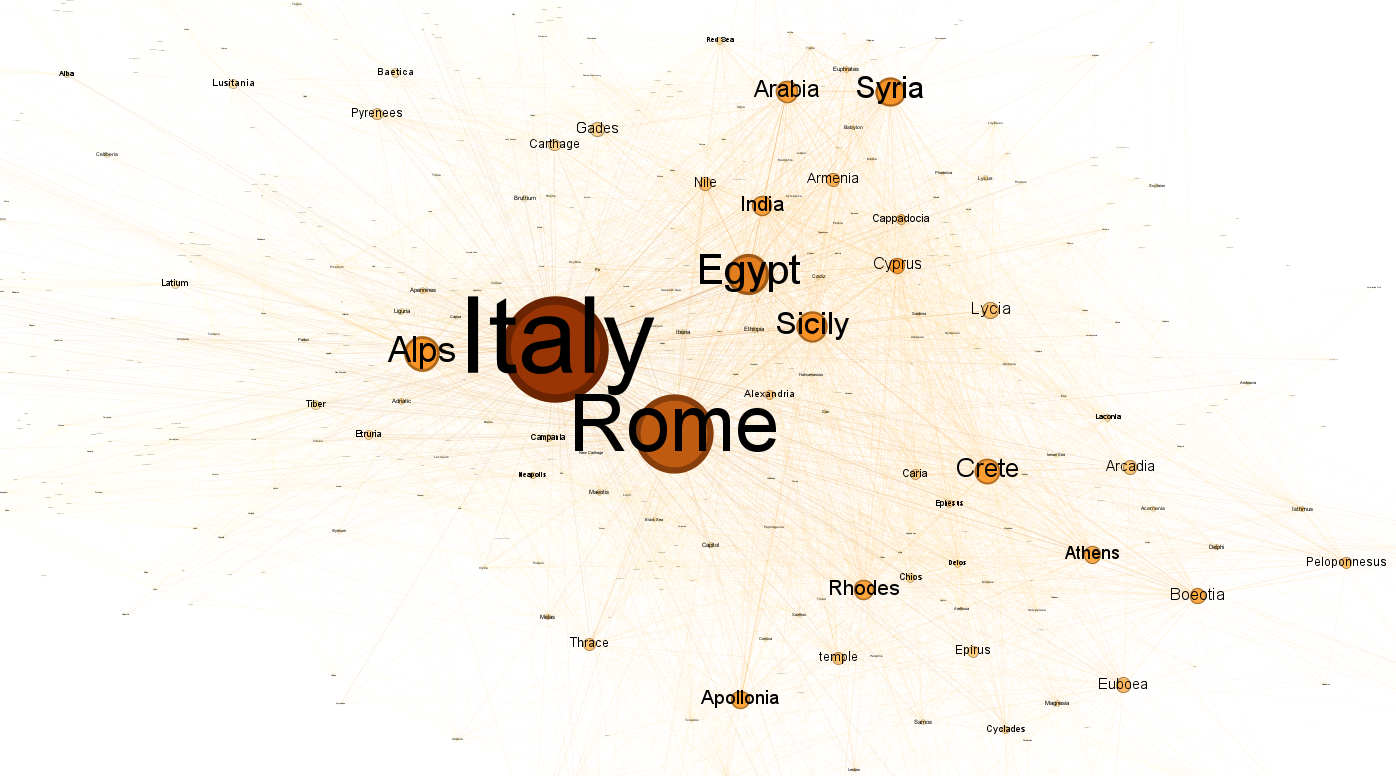

In [63]:
#| label: fig-geoname_network
#| fig-cap: Network graph for place namesmentioned in Natural History

from IPython.display import Image
Image(filename='geonamenw.png')

To gain a more detailed cluster of narrative contents about Indian subcontinent in *Natural History*, the idea is to generate a network for book number, place names and person names in the target corpus. The person name nodes are retrieved from the tagging of text given by the pretrained multilingual Name Entity Recognition model [WikiNEuRal](https://huggingface.co/Babelscape/wikineural-multilingual-ner) [@tedeschi2021]. 

\##(will further compare with scraping  person name annotations from ToposText, to see which way gets more accurate information.)

In [7]:
#| echo: false

#set pipeline for the NER model

from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("Babelscape/wikineural-multilingual-ner")
model = AutoModelForTokenClassification.from_pretrained("Babelscape/wikineural-multilingual-ner")

# changed to "device = cpu" for not having a discrete GPU 
ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="first", device="cpu")

In [68]:
#| echo: false
#| output: false

example = " Perfumes serve the purpose of the most superfluous of all forms of luxury; india for pearls and jewels do nevertheless pass to the wearer's heir, and clothes last for some time, but unguents lose their scent at once, and die in the very hour when they are used. Their highest recommendation is that when a woman passes by her scent may attract the attention even of persons occupied in something else — and their cost is more than 400 denarii per pound! All that money is paid for a pleasure enjoyed by somebody else, for a person carrying scent about him does not smell it himself. Still, if even these matters deserve to be graded after a fashion, we find in the works left by Marcus Cicero that unguents that have an earthy scent are more agreeable than those smelling of saffron, inasmuch as even in a class of things where corruption is most rife, nevertheless some degree of strictness in vice itself gives more enjoyment. But there are people who get most pleasure from unguent of a dense consistency, which they call thick essence, and who enjoy smearing themselves with perfume and not merely pouring it over them. We have even seen people put scent on the soles of their feet, a practice said to have been taught to the emperor Nero by Marcus Otho; pray, how could it be noticed or give any pleasure from that part of the body? Moreover, we have heard that somebody of private station gave orders for the walls of his bathroom to be sprinkled with scent, and that the Emperor Caligula had the bathtubs scented, and so also later did one of the slaves of Nero — so that this must not be considered a privilege of princes! Yet what is most surprising is that this indulgence has found its way even into the camp: at all events the eagles and the standards, dusty as they are and bristling with sharp points, are anointed on holidays — and I only wish we were able to say who first introduced this custom! No doubt the fact is that our eagles were bribed by this reward to conquer the world! We look to their patronage forsooth to sanction our vices, so as to have this legitimation for using hair-oil under a helmet!"
ner_results = ner(example)
print(ner_results)

[{'entity_group': 'PER', 'score': 0.9917679, 'word': 'Marcus Cicero', 'start': 674, 'end': 687}, {'entity_group': 'PER', 'score': 0.9901232, 'word': 'Nero', 'start': 1233, 'end': 1237}, {'entity_group': 'PER', 'score': 0.99782413, 'word': 'Marcus Otho', 'start': 1241, 'end': 1252}, {'entity_group': 'PER', 'score': 0.9741029, 'word': 'Caligula', 'start': 1481, 'end': 1489}, {'entity_group': 'PER', 'score': 0.991039, 'word': 'Nero', 'start': 1559, 'end': 1563}]


The tags for name entity groups retrieved from WikiNEuRal model is appended as a new column in the corpus dataframe. And the tags as "PER", which means "person name" are further extracted as another column. 

In [12]:
#| df-print: tibble

# apply the NER model to the Indian subcontinent related texts and store the retrieved tags in a new column 
geotext_india['Text_ner'] =  geotext_india['Text'].progress_apply(ner)

# append the words with tag as "PER" i.e. person name into the dataframe
geotext_india['PER_names'] = geotext_india['Text_ner'].apply(lambda x: [entity['word'] for entity in x if entity['entity_group'] == 'PER'])
geotext_india[['Place_Name','Book','Chapter','Paragraph','Text_ner','PER_names']].head()

100%|██████████| 229/229 [03:02<00:00,  1.25it/s]
C:\Users\dawn\AppData\Local\Temp\ipykernel_11660\3949739019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geotext_india['Text_ner'] =  geotext_india['Text'].progress_apply(ner)
C:\Users\dawn\AppData\Local\Temp\ipykernel_11660\3949739019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geotext_india['PER_names'] = geotext_india['Text_ner'].apply(lambda x: [entity['word'] for entity in x if entity['entity_group'] == 'PER'])


Place_Name  Book  Chapter  Paragraph  \
85       India     2       75        1.0   
92       India     2       75        1.0   
93       India     2       75        1.0   
218      Indus     2       98        1.0   
343      India     2      112        1.0   

                                              Text_ner  \
85   [{'entity_group': 'LOC', 'score': 0.99636984, ...   
92   [{'entity_group': 'LOC', 'score': 0.99636984, ...   
93   [{'entity_group': 'LOC', 'score': 0.99636984, ...   
218  [{'entity_group': 'LOC', 'score': 0.999539, 'w...   
343  [{'entity_group': 'LOC', 'score': 0.7412269, '...   

                                            PER_names  
85   [Onesicritus, Alexander, Alexander, Onesicritus]  
92   [Onesicritus, Alexander, Alexander, Onesicritus]  
93   [Onesicritus, Alexander, Alexander, Onesicritus]  
218                                                []  
343  [Artemidorus, Isidore, Artemidorus, Artemidorus]

The rows containing no person name were dropped and those with multiple person name records were exploded to separate rows. 

In [13]:
#| df-print: tibble

geotext_india_exploded = geotext_india.explode('PER_names')
geotext_india_exploded.dropna(subset=['PER_names'], inplace=True)
geotext_india_exploded[['Place_Name', 'Book','PER_names']]

Place_Name  Book    PER_names
85        India     2  Onesicritus
85        India     2    Alexander
85        India     2    Alexander
85        India     2  Onesicritus
92        India     2  Onesicritus
...         ...   ...          ...
8842      India    37      Jupiter
8847      India    37   Xenocrates
8866      Indus    37   Democritus
8873      India    37       Nature
8873      India    37       Nature

[453 rows x 3 columns]

Within the Indian subcontinent context, the nodes consist of three types, namely **place name**, **person name** and **book number**. 

And there are four types of edges being recorded and combined, including the co-occurence of:

1. **place name** and **person name** in the same paragraph</br>
2. **person name** and **book number**</br>
3. **place name** and **book number**</br>
4. **place name** and **place name** in the same paragraph</br>

In [15]:
# define a function for generating the edge data for co-occurence of two places in a same paragraph
def place_name_edge (inputdf):
    
    co_occurrence = pd.DataFrame(columns=['source', 'target'])
    
    for i in range(len(inputdf)):
        for j in range(i+1, len(inputdf)):
            place1 = inputdf['Place_Name'].iloc[i]
            place2 = inputdf['Place_Name'].iloc[j]
            
            if place1 == place2:
                continue
                
            if geotext_whole['Book'].iloc[i] == geotext_whole['Book'].iloc[j]:
                if geotext_whole['Chapter'].iloc[i] == geotext_whole['Chapter'].iloc[j]:
                    if geotext_whole['Paragraph'].iloc[i] == geotext_whole['Paragraph'].iloc[j]:
                        co_occurrence = pd.concat([co_occurrence, pd.DataFrame({'source': [place1], 'target': [place2]})], ignore_index=True)
    return co_occurrence

In [16]:
edge1 = geotext_india_exploded[['Place_Name', 'PER_names']]
edge1.rename(columns={'Place_Name': 'source', 'PER_names': 'target'}, inplace=True)

edge2 = geotext_india_exploded[['PER_names','Book']]
edge2.rename(columns={'PER_names': 'source', 'Book': 'target'}, inplace=True)

edge3 = geotext_india[['Place_Name', 'Book']]
edge3.rename(columns={'Place_Name': 'source', 'Book': 'target'}, inplace=True)

edge4 = place_name_edge(geotext_india)

# combine the four types of edges and save to .csv
combined_edge = pd.concat([edge1, edge2, edge3, edge4], axis=0)
combined_edge = combined_edge.reset_index(drop=True)
combined_edge.to_csv('indiatext_edge.csv', index=False)


node1 = pd.DataFrame(geotext_india['Place_Name'].drop_duplicates()).rename(columns={'Place_Name': 'id'})
node1['label'] = node1['id']
node1['type'] = 'Place_Name'

node2 = pd.DataFrame(geotext_india['Book'].drop_duplicates()).rename(columns={'Book': 'id'})
node2['label'] = 'Book ' + node2['id'].astype(str)
node2['type'] = 'Book'

node3 = pd.DataFrame(geotext_india_exploded['PER_names'].drop_duplicates()).rename(columns={'PER_names': 'id'})
node3['label'] = node3['id']
node3['type'] = 'Person_Name'

# combine the three types of nodes and save to .csv
combined_node = pd.concat([node1, node2, node3], axis=0)
combined_node = combined_node.reset_index(drop=True)
combined_node.to_csv('indiatext_node.csv', index=False)

node_count2 = len(combined_node)
edge_count2 = len(combined_edge)

display(Markdown("""In the network analysis for place names and person names within the Indian subcontinent context, there are total {node_count} nodes 
and {edge_count} edges in the prepared data.
""".format(node_count = node_count2, edge_count = edge_count2)))


C:\Users\dawn\AppData\Local\Temp\ipykernel_11660\920134953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge1.rename(columns={'Place_Name': 'source', 'PER_names': 'target'}, inplace=True)
C:\Users\dawn\AppData\Local\Temp\ipykernel_11660\920134953.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edge2.rename(columns={'PER_names': 'source', 'Book': 'target'}, inplace=True)
C:\Users\dawn\AppData\Local\Temp\ipykernel_11660\920134953.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In the network analysis for place names and person names within the Indian subcontinent context, there are total 158 nodes 
and 1353 edges in the prepared data.


In [33]:
def extract_people_info(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, features="lxml")

    people_links = []
    people_names = []

    # Find all <a> tags with href="/people/
    a_tags = soup.find_all("a", href=lambda href: href and href.startswith("/people/"))

    # Loop through the <a> tags and extract the links and names
    for a_tag in a_tags:
        link = a_tag["href"]
        name = a_tag.text.strip()

        people_links.append(link)
        people_names.append(name)

    # Create a new DataFrame
    data = {
        "Link": people_links,
        "Name": people_names
    }

    peopletag_df = pd.DataFrame(data)
    peopletag_df.drop_duplicates(subset=["Link", "Name"], inplace=True)
    return peopletag_df

# List of URLs
urls = [url1, url2]

# Concatenate DataFrames for each URL
result_df = pd.concat([extract_people_info(url) for url in urls])

# Drop duplicates based on both "Link" and "Name" columns
result_df.drop_duplicates(subset=["Link", "Name"], inplace=True)

print(result_df)

              Link          Name
0       /people/54         Muses
1     /people/1881      Catullus
2     /people/2300        Cicero
4      /people/382        Manius
5     /people/1515       Persius
...            ...           ...
6972  /people/9015  Bostrychitis
6990  /people/7679       Eusebes
6999  /people/6553         Idaei
7001  /people/9782      Memnonia
7017  /people/6166          Adad

[2764 rows x 2 columns]


In [12]:
#| echo: false
edge1 = geotext_india_exploded[['Place_Name', 'PER_names']]

edge1.to_csv('NH_NG_place_person.csv')

In [14]:
#| echo: false
edge2 = geotext_india_exploded[['PER_names','Book']]

edge2.to_csv('NH_NG_person_book.csv')



In [17]:
#| echo: false
edge3 = geotext_india[['Place_Name', 'Book']]
edge3.to_csv('NH_NG_place_book.csv')

In [20]:
#| echo: false
edge4 = place_name_edge(geotext_india)
edge4.to_csv('NH_NG_place1_place2.csv')


In [22]:
#| echo: false
node1 = pd.DataFrame(geotext_india['Place_Name'].drop_duplicates()).rename(columns={'Place_Name': 'id'})
node1['label'] = node1['id']
node1['type'] = 'Place_Name'
node1.to_csv('NH_NG_placenode.csv')

In [24]:
#| echo: false
node2 = pd.DataFrame(geotext_india['Book'].drop_duplicates()).rename(columns={'Book': 'id'})
node2['label'] = 'Book ' + node2['id'].astype(str)
node2['type'] = 'Book'
node2.to_csv('NH_NG_booknode.csv')

In [27]:
#| echo: false
node3 = pd.DataFrame(geotext_india_exploded['PER_names'].drop_duplicates()).rename(columns={'PER_names': 'id'})
node3['label'] = node3['id']
node3['type'] = 'Person_Name'
node3.to_csv('NH_NG_personnode.csv')

As manifested in @fig-indiantext_clustering, there is obvious clustering of person names occuring in Indian subcontinent related texts. In other words, groups of person names are tend to be referenced in some specific topics. 

\##(more detailed illustration will be further conducted.)